# Анализ оттока клиентов

Проанализируйте клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.

В нашем распоряжении датасет bank_scrooge.csv, который содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Заказчик исследования - отдел маркетинга

**Цель исследования** : Наиболее точно выделить группы отточных клиентов банка для дальнейшей проработки результатов исследования отделом маркетинга.

# 1. Открыть файл с данными и изучить общую информацию:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns
import itertools
import numpy as np
from scipy import stats as st
import math as mth
from matplotlib import rcParams

# Уберем предупреждения, чтобы они не отвлекали от результатов работы
import warnings
warnings.filterwarnings("ignore")

# Разрешим выводить большое число строк
pd.set_option('display.max_rows',100)

In [2]:
try:
    data=pd.read_csv('./bank_scrooge.csv')
### КОД РЕВЬЮЕРА
except FileNotFoundError:
    # чтение файла bank_scrooge.csv с данными и сохранение его в переменную 
    path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
    data = pd.read_csv(path)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [4]:
data.describe()

USERID         score          age        equity       balance  \
count   10000.00000  10000.000000  9974.000000  10000.000000  7.705000e+03   
mean   171814.71260    848.699400    42.734409      2.627600  8.277943e+05   
std     33708.23812     65.448519    12.179971      1.980836  1.980614e+06   
min     94561.00000    642.000000    18.000000      0.000000  0.000000e+00   
25%    142810.25000    802.000000    33.000000      0.000000  2.955542e+05   
50%    172728.00000    853.000000    40.000000      3.000000  5.242722e+05   
75%    201261.75000    900.000000    51.000000      4.000000  9.807058e+05   
max    229145.00000   1000.000000    86.000000      9.000000  1.191136e+08   

           products   credit_card  last_activity    EST_SALARY         churn  
count  10000.000000  10000.000000   10000.000000  1.000000e+04  10000.000000  
mean       1.870100      0.680400       0.523500  1.478669e+05      0.182000  
std        0.792647      0.466345       0.499472  1.393885e+05      0.385864  
min        0.000000      0.000000       0.000000  2.546300e+03      0.000000  
25%        1.000000      0.000000       0.000000  7.525190e+04      0.000000  
50%        2.000000      1.000000       1.000000  1.196581e+05      0.000000  
75%        2.000000      1.000000       1.000000  1.745005e+05      0.000000  
max        5.000000      1.000000       1.000000  1.395064e+06      1.000000

In [5]:
#просмотр данных столбца: уникальные значения, тип данных, кол-во пропусков
def preprocessing(column):
    #print(column, '-', dict_name[column])
    print('тип данных', data[column].dtypes)
    print('количество пропусков',data[column].isna().sum())
    if data[column].dtypes != 'object':
        print('минимальное значение:',data[column].min(), 'максимальное значение:', data[column].max() )
    print('уникальные значения:', '\n', data[column].value_counts())

In [6]:
preprocessing('USERID')

тип данных int64
количество пропусков 0
минимальное значение: 94561 максимальное значение: 229145
уникальные значения: 
 141265    2
217826    2
126368    2
195884    2
202983    2
         ..
199413    1
205705    1
221433    1
152512    1
96267     1
Name: USERID, Length: 9927, dtype: int64


In [7]:
preprocessing('score')

тип данных float64
количество пропусков 0
минимальное значение: 642.0 максимальное значение: 1000.0
уникальные значения: 
 900.0    80
889.0    75
894.0    70
899.0    70
908.0    68
         ..
666.0     1
667.0     1
684.0     1
673.0     1
995.0     1
Name: score, Length: 348, dtype: int64


In [8]:
preprocessing('age')

тип данных float64
количество пропусков 26
минимальное значение: 18.0 максимальное значение: 86.0
уникальные значения: 
 36.0    414
37.0    402
33.0    392
35.0    388
34.0    384
32.0    380
38.0    334
39.0    331
40.0    324
31.0    324
42.0    312
41.0    306
30.0    275
43.0    264
44.0    262
29.0    236
28.0    210
45.0    210
46.0    197
50.0    190
49.0    186
48.0    179
53.0    175
27.0    171
58.0    169
60.0    168
51.0    168
55.0    165
47.0    161
57.0    161
26.0    155
52.0    154
56.0    149
61.0    147
25.0    140
54.0    139
59.0    130
63.0    106
62.0    106
64.0     95
24.0     89
68.0     89
65.0     88
66.0     83
67.0     57
23.0     53
69.0     53
71.0     36
72.0     35
70.0     33
22.0     27
20.0     23
73.0     21
74.0     19
75.0     16
19.0     16
21.0     15
76.0     13
18.0     13
77.0      8
80.0      7
78.0      6
81.0      4
83.0      3
82.0      2
84.0      2
79.0      2
86.0      2
Name: age, dtype: int64


In [9]:
preprocessing('equity')

тип данных int64
количество пропусков 0
минимальное значение: 0 максимальное значение: 9
уникальные значения: 
 0    2592
5    1918
4    1850
3    1543
2    1052
1     774
6     161
7      80
8      17
9      13
Name: equity, dtype: int64


In [10]:
preprocessing('balance')

тип данных float64
количество пропусков 2295
минимальное значение: 0.0 максимальное значение: 119113552.01
уникальные значения: 
 26.00         2
0.00          2
38.00         2
39.00         2
59214.82      1
             ..
924011.29     1
1452458.87    1
1294391.76    1
1106127.02    1
1180886.70    1
Name: balance, Length: 7701, dtype: int64


In [11]:
preprocessing('products')

тип данных int64
количество пропусков 0
минимальное значение: 0 максимальное значение: 5
уникальные значения: 
 2    5126
1    3341
3    1039
4     474
5      19
0       1
Name: products, dtype: int64


In [12]:
preprocessing('credit_card')

тип данных int64
количество пропусков 0
минимальное значение: 0 максимальное значение: 1
уникальные значения: 
 1    6804
0    3196
Name: credit_card, dtype: int64


In [13]:
preprocessing('last_activity')

тип данных int64
количество пропусков 0
минимальное значение: 0 максимальное значение: 1
уникальные значения: 
 1    5235
0    4765
Name: last_activity, dtype: int64


In [14]:
preprocessing('EST_SALARY')

тип данных float64
количество пропусков 0
минимальное значение: 2546.3 максимальное значение: 1395064.45
уникальные значения: 
 49742.87     2
108250.17    2
176348.18    2
381868.89    2
75719.14     1
            ..
163867.40    1
124613.12    1
88651.54     1
127424.00    1
21422.37     1
Name: EST_SALARY, Length: 9996, dtype: int64


In [15]:
preprocessing('churn')

тип данных int64
количество пропусков 0
минимальное значение: 0 максимальное значение: 1
уникальные значения: 
 0    8180
1    1820
Name: churn, dtype: int64


**<p>Вывод по первому разделу:<p/>**
В анализируемом датасете 10000 строк с данными.
Таблица содержит 12 столбцов:

 - userid — идентификатор пользователя,
 - score — баллы кредитного скоринга,
 - City — город,
 - Gender — пол,
 - Age — возраст,
 - Objects — количество объектов в собственности 
 - equity  — количество баллов собственности
 - Balance — баланс на счёте,
 - Products — количество продуктов, которыми пользуется клиент,
 - CreditCard — есть ли кредитная карта,
 - Loyalty / last_activity — активный клиент,
 - estimated_salary — заработная плата клиента,
 - Churn — ушёл или нет.
 
  Имеются пропуски в столбцах возраст и баланс на счете. Названия столбцов необходимо привести к змеиному регистру. Также необходимо "закодировать" столбец гендер к виду 0/1, разобраться с природой пропусков в столбце возраст и счет.Проверить данные на дубликаты


# 2. Предобработка данных

Изучим датасет по подробнее

In [16]:
#функция для вывода состава столбцов
def describe_cols(data_data):
    data = data_data
    values = pd.DataFrame()
    
    for col in data.columns:
        values[col] = [data[col].unique(), data[col].dtypes, data[col].nunique()]
        
    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Значения', 1: 'тип данных', 2: 'Кол-во уникальных значений'}, axis=1)


#функция для вывода пустых значений и их доли в столбцах датафрейма
def nan_values(data_data):
    data = data_data
    count_missing = data.isna().sum()
    percent_missing = round(data.isna().sum() * 100 / len(data), 2)
    
    missing_value_data = pd.DataFrame({'column_name': data.columns,
                                     'num_missing': count_missing,
                                     'percent_missing': percent_missing})
    
    return missing_value_data


#функция для вывода информации о файле
def data_info (data_data):
    print('Количество строк файла:', len(data_data))
    print()
    print('Информация о содержимом файла:')
    display(describe_cols(data_data))
    print()
    print('Информация о пропусках данных:')
    display(nan_values(data_data))
    print()
    print('Первые пять строк таблицы:')
    display(data_data.head())

In [17]:
data_info(data)

Количество строк файла: 10000

Информация о содержимом файла:


Значения тип данных  \
USERID         [183012, 146556, 120722, 225363, 157978, 20230...      int64   
equity                            [1, 5, 0, 4, 3, 2, 6, 7, 8, 9]      int64   
products                                      [2, 3, 1, 4, 5, 0]      int64   
credit_card                                               [0, 1]      int64   
last_activity                                             [1, 0]      int64   
churn                                                     [1, 0]      int64   
score          [850.0, 861.0, 892.0, 866.0, 730.0, 856.0, 807...    float64   
age            [25.0, 37.0, 30.0, 51.0, 34.0, 56.0, 39.0, 38....    float64   
balance        [59214.82, 850594.33, nan, 1524746.26, 174.0, ...    float64   
EST_SALARY     [75719.14, 86621.77, 107683.34, 174423.53, 673...    float64   
city                                [Рыбинск, Ярославль, Ростов]     object   
gender                                                    [Ж, М]     object   

              Кол-во уникальных значений  
USERID                              9927  
equity                                10  
products                               6  
credit_card                            2  
last_activity                          2  
churn                                  2  
score                                348  
age                                   68  
balance                             7701  
EST_SALARY                          9996  
city                                   3  
gender                                 2


Информация о пропусках данных:


column_name  num_missing  percent_missing
USERID                USERID            0             0.00
score                  score            0             0.00
city                    city            0             0.00
gender                gender            0             0.00
age                      age           26             0.26
equity                equity            0             0.00
balance              balance         2295            22.95
products            products            0             0.00
credit_card      credit_card            0             0.00
last_activity  last_activity            0             0.00
EST_SALARY        EST_SALARY            0             0.00
churn                  churn            0             0.00


Первые пять строк таблицы:


USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1

Пропуски в столбце "возраст" - составляют 0,26%, что является незначительной величиной и не влияет на данные исследования.
Пропуски в столбце "баланс на счете" - состаляют 22,95%

Приведем наименования стобцов к нижнему регистру

In [18]:
data.columns = data.columns.str.lower()
data.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

In [19]:
data = data.query('products != 0')
data.head()

userid  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  est_salary  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9999 non-null   int64  
 1   score          9999 non-null   float64
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9973 non-null   float64
 5   equity         9999 non-null   int64  
 6   balance        7705 non-null   float64
 7   products       9999 non-null   int64  
 8   credit_card    9999 non-null   int64  
 9   last_activity  9999 non-null   int64  
 10  est_salary     9999 non-null   float64
 11  churn          9999 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1015.5+ KB


Проверим датасет на дубликаты

In [21]:
data.duplicated().sum()

0

Количество дубликатов:

In [22]:
data.drop(columns='userid').duplicated().sum()


0

Вернемся к пропускам, проверим информацию по датафрейму, в котором незаполнен столбец "баланс на счете" и в котором отсутствуют пропуски:

In [23]:
display(data[data['balance'].isnull()].describe())

userid        score          age       equity  balance  \
count    2294.000000  2294.000000  2278.000000  2294.000000      0.0   
mean   172080.011334   865.309939    42.076822     0.049695      NaN   
std     33340.511155    89.599887    11.919094     0.217361      NaN   
min    114182.000000   642.000000    18.000000     0.000000      NaN   
25%    143091.750000   871.000000    33.000000     0.000000      NaN   
50%    172713.500000   903.000000    40.000000     0.000000      NaN   
75%    201554.000000   922.000000    49.000000     0.000000      NaN   
max    229145.000000   990.000000    86.000000     1.000000      NaN   

          products  credit_card  last_activity    est_salary        churn  
count  2294.000000  2294.000000    2294.000000  2.294000e+03  2294.000000  
mean      1.162598     0.816042       0.549695  2.263979e+05     0.005231  
std       0.401888     0.387535       0.497633  1.997711e+05     0.072152  
min       1.000000     0.000000       0.000000  2.027403e+04     0.000000  
25%       1.000000     1.000000       0.000000  1.204182e+05     0.000000  
50%       1.000000     1.000000       1.000000  1.742028e+05     0.000000  
75%       1.000000     1.000000       1.000000  2.400706e+05     0.000000  
max       3.000000     1.000000       1.000000  1.333687e+06     1.000000

In [24]:
display(data[~data['balance'].isna()].describe())

userid        score          age       equity       balance  \
count    7705.000000  7705.000000  7695.000000  7705.000000  7.705000e+03   
mean   171738.837508   843.739260    42.924366     3.395068  8.277943e+05   
std     33819.778127    55.332162    12.244010     1.584477  1.980614e+06   
min     94561.000000   689.000000    18.000000     0.000000  0.000000e+00   
25%    142639.000000   801.000000    33.000000     2.000000  2.955542e+05   
50%    172740.000000   840.000000    40.000000     4.000000  5.242722e+05   
75%    201168.000000   882.000000    52.000000     5.000000  9.807058e+05   
max    229136.000000  1000.000000    86.000000     9.000000  1.191136e+08   

          products  credit_card  last_activity    est_salary        churn  
count  7705.000000  7705.000000    7705.000000  7.705000e+03  7705.000000  
mean      2.080986     0.640104       0.515769  1.245019e+05     0.234523  
std       0.757231     0.480001       0.499784  1.046635e+05     0.423728  
min       1.000000     0.000000       0.000000  2.546300e+03     0.000000  
25%       2.000000     0.000000       0.000000  6.755181e+04     0.000000  
50%       2.000000     1.000000       1.000000  1.062222e+05     0.000000  
75%       2.000000     1.000000       1.000000  1.550457e+05     0.000000  
max       5.000000     1.000000       1.000000  1.395064e+06     1.000000

Анализируя таблицы выше, в столбце "баланс на счете" значится дебетовый счет в банке. Все пропуски в столбце "баланс на счете" означают, что счет  там не открыт на момент выгрузки данных. Удалять либо заменять пропуски в данном столбце не считаю целесообразным, т.к. для таких действий необходимо связаться с заказчиком и обговорить методику проработки пропусков.


22,95 % пропусков мы наблюдаем в одном из признаков клиента, а именно балансе содержащемся на счете у клиентов.

Перед тем, как выбрать работу с пропусками в столбце balance, необходимо посмотреть на распределения остальных признаков в группе клиентов с пропусками. Затем попробовать предположить, по какому механизму пропуски сформировались:

MCAR (Missing Completely At Random),
MAR (Missing At Random),
MNAR (Missing Not At Random).
Предположим гипотезы:

техническая ошибка при сборе данных
значения "NaN" соответствует нулевому балансу клиенту
От механизма образования пропусков будет зависеть то, как мы их обработаем.

In [25]:
#наличие дубликатов 
print('В датасете {} полных дубликатов'.format(data.duplicated().sum()))

В датасете 0 полных дубликатов


In [26]:
#проверка уникальности идентификатора клиента
data['userid'].nunique()

9926

In [27]:
data = data.drop_duplicates(subset=['userid'], keep='first')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9926 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9926 non-null   int64  
 1   score          9926 non-null   float64
 2   city           9926 non-null   object 
 3   gender         9926 non-null   object 
 4   age            9922 non-null   float64
 5   equity         9926 non-null   int64  
 6   balance        7667 non-null   float64
 7   products       9926 non-null   int64  
 8   credit_card    9926 non-null   int64  
 9   last_activity  9926 non-null   int64  
 10  est_salary     9926 non-null   float64
 11  churn          9926 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1008.1+ KB


Удалила из датасета 73 дубликата по столбцу "userid"

Закодируем "пол". Столбец "город" трансформируем в три отдельных столбца соответственно 'Рыбинск', 'Ярославль', 'Ростов', также закодируем.

In [29]:
data['gender'] = data['gender'].map({'М':1, 'Ж':0})
# Для стобца "city" сначала сделаем разбивку по городам, затем названия стобцов приведем в необходимый вид:
data['all_city']=data['city']
data = pd.get_dummies(data, columns=['city'])
data =  data.rename(columns={'city_Ростов':'Ростов', 'city_Рыбинск':'Рыбинск', 'city_Ярославль':'Ярославль'})

# Выведем таблицу:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9926 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9926 non-null   int64  
 1   score          9926 non-null   float64
 2   gender         9926 non-null   int64  
 3   age            9922 non-null   float64
 4   equity         9926 non-null   int64  
 5   balance        7667 non-null   float64
 6   products       9926 non-null   int64  
 7   credit_card    9926 non-null   int64  
 8   last_activity  9926 non-null   int64  
 9   est_salary     9926 non-null   float64
 10  churn          9926 non-null   int64  
 11  all_city       9926 non-null   object 
 12  Ростов         9926 non-null   uint8  
 13  Рыбинск        9926 non-null   uint8  
 14  Ярославль      9926 non-null   uint8  
dtypes: float64(4), int64(7), object(1), uint8(3)
memory usage: 1.0+ MB


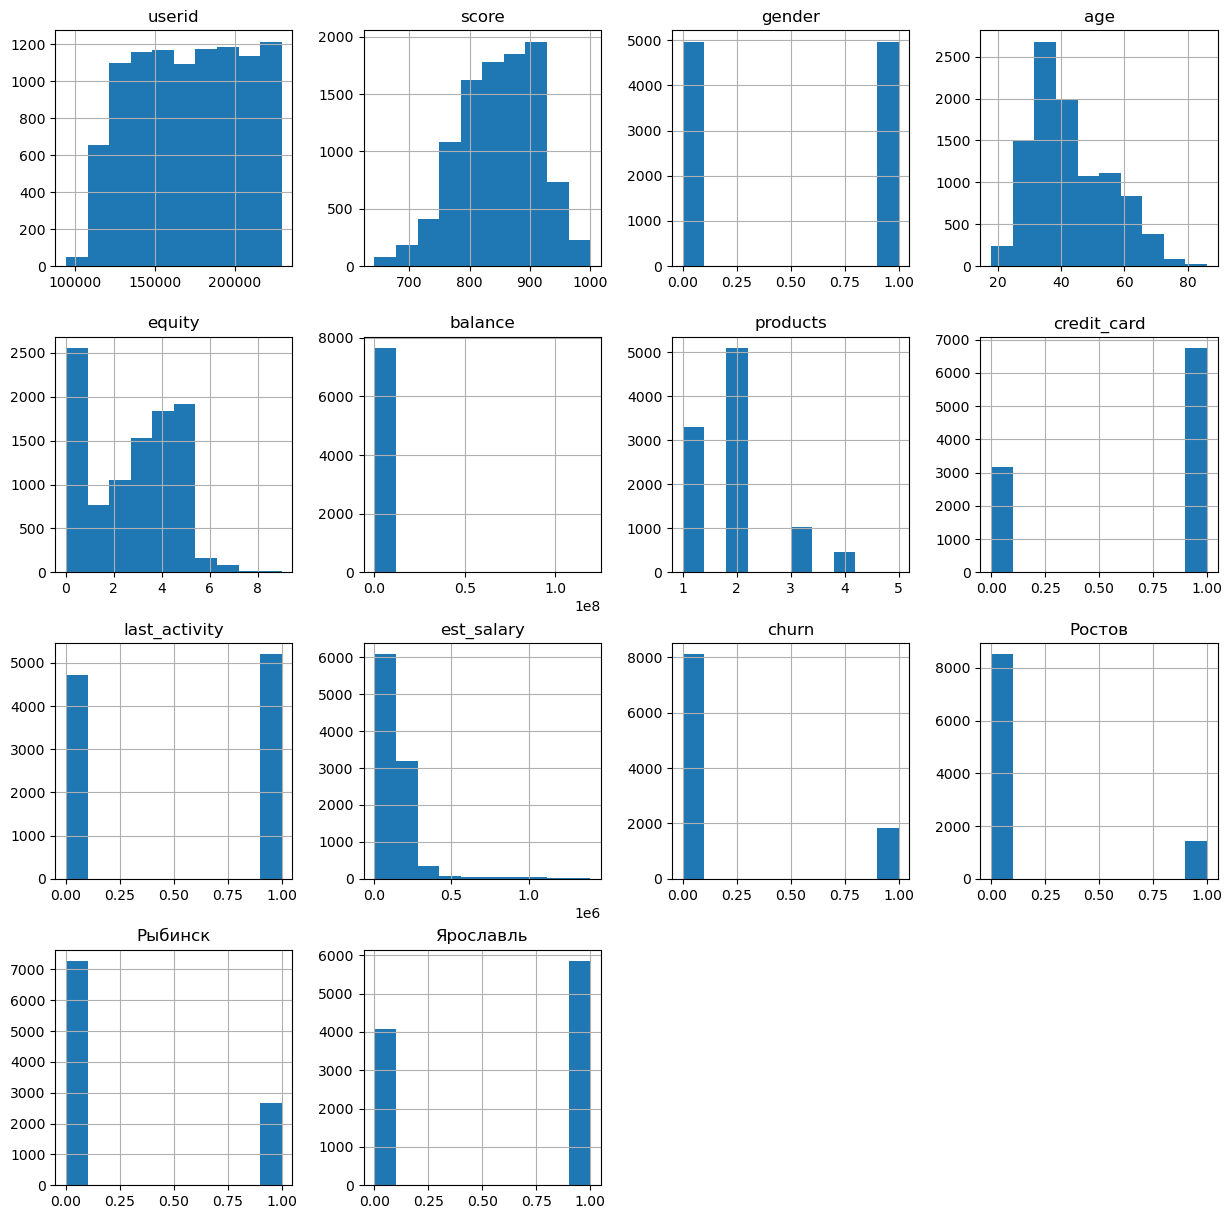

In [30]:
data.hist(figsize=(15,15))
plt.show()

In [31]:
#data.pivot_table(data, index=["age",'churn'], aggfunc='sum')

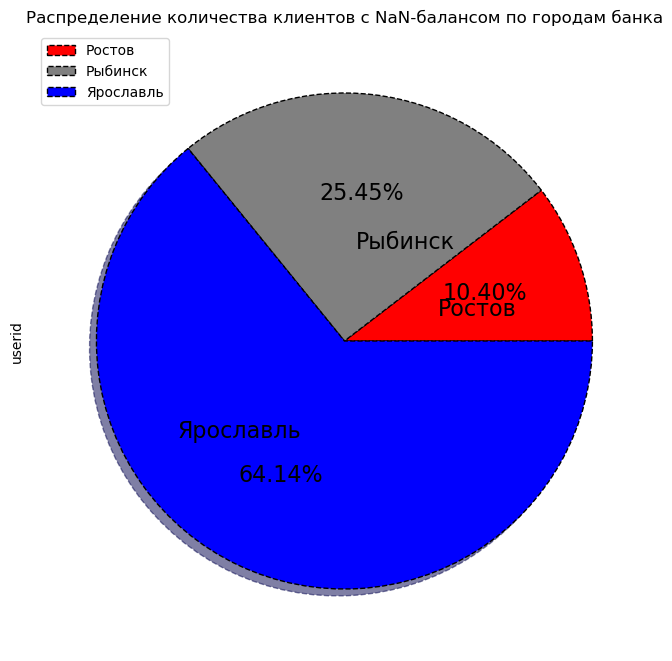

In [32]:
# распределение клиентов c пропущенными значениями по городам

data_nan_balance=data[(data['balance'].isna() == True)]

colors = ( "red", "grey","blue")

ax = data_nan_balance.groupby('all_city').agg({'userid':'count'}).plot.pie(
    explode=None,
    y='userid',
    figsize=(8,10),fontsize=16,
    shadow=True,
    colors=colors,
    labeldistance=0.4,
    wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"},
    title='Распределение количества клиентов с NaN-балансом по городам банка',
    legend=True,
    autopct='%1.2f%%')

plt.show()

Самое большое кол-во пропусков приходится на город Ярославль- 64,12 %.

In [33]:
data_test=data['balance']
data_test

0         59214.82
1        850594.33
2              NaN
3       1524746.26
4           174.00
           ...    
9995      78144.65
9996           NaN
9997           NaN
9998     865457.97
9999    1180886.70
Name: balance, Length: 9926, dtype: float64

В пропущенных данных по признаку баланс клиенты не склонны к оттоку

In [34]:
# в переменную х сохраним количество строк по каждому городу
x = (data.value_counts('all_city').to_frame().rename(columns = {0:'count_loc'}))
# в переменную y сохраним количество пропусков в столбце 'balance' по каждому городу
y = (data[data['balance'].isna()].value_counts('all_city')).to_frame().rename(columns = {0:'count_gap'})
# объединим результаты переменных х и у в переменной z
z = x.join(y, how = 'outer').reset_index().sort_values(by = 'count_loc', ascending = False)
z.style.format("{:,.0f}", subset = ['count_gap', 'count_loc'])


In [35]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   all_city   3 non-null      object
 1   count_loc  3 non-null      int64 
 2   count_gap  3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes


In [36]:
z['percent_churn']=(z['count_gap']/z['count_loc'])*100
z.head()

all_city  count_loc  count_gap  percent_churn
0  Ярославль       5856       1449      24.743852
1    Рыбинск       2653        575      21.673577
2     Ростов       1417        235      16.584333

Больше всего пропусков в столбце 'balance' у тех клиентов банка, которые находятся в городе Ярославль - 1 449 пропусков.

Подобным образом рассмотрим количество пропусков в столбце 'balance' в зависимости от того: уходит клиент из банка или нет, есть ли у него кредитная карта.

In [37]:
# в переменную х сохраним количество строк уход клиента 
x = (data.value_counts('churn').to_frame().rename(columns = {0:'count_loc'}))
# в переменную y сохраним количество пропусков в столбце 'balance' по уходу клиента
y = (data[data['balance'].isna()].value_counts('churn')).to_frame().rename(columns = {0:'count_gap'})
# объединим результаты переменных х и у в переменной z
z = x.join(y, how = 'outer').reset_index().sort_values(by = 'count_loc', ascending = False)
z.style.format("{:,.0f}", subset = ['count_gap', 'count_loc'])

Больше всего пропусков в столбце 'balance' у клиентов, которые остаются в банке - 2 247 пропусков.

In [38]:
# в переменную х сохраним количество строк, которые показывают наличие кредитной карты
x = (data.value_counts('credit_card').to_frame().rename(columns = {0:'count_loc'}))
# в переменную y сохраним количество пропусков в столбце 'balance' в зависимости от наличия кредитной карты
y = (data[data['balance'].isna()].value_counts('credit_card')).to_frame().rename(columns = {0:'count_gap'})
# объединим результаты переменных х и у в переменной z
z = x.join(y, how = 'outer').reset_index().sort_values(by = 'count_loc', ascending = False)
z.style.format("{:,.0f}", subset = ['count_gap', 'count_loc'])

Больше всего пропусков в столбце 'balance' у клиентов, которые имеют кредитную карту - 1843 пропуск.


Посмотрим количество пропусков в столбце 'balance' у тех пользователей, которые остались в банке и пользуются кредитными картами.

In [39]:
# в переменную client сохраним информацию о клиентах, которые остались в банке
client = data.query('churn == 0')
# в переменную х сохраним количество строк, которые показывают наличие кредитной карты
x = (client.value_counts('credit_card').to_frame().rename(columns = {0:'count_loc'}))
# в переменную y сохраним количество пропусков в столбце 'balance' в зависимости от наличия кредитной карты
y = (client[client['balance'].isna()].value_counts('credit_card')).to_frame().rename(columns = {0:'count_gap'})
# объединим результаты переменных х и у в переменной z
z = x.join(y, how = 'outer').reset_index().sort_values(by = 'count_loc', ascending = False)
z.style.format("{:,.0f}", subset = ['count_gap', 'count_loc'])

Больше всего пропусков в столбце 'balance' у клиентов, которые остались в банке и имеют кредитные карты.

In [40]:
# в переменную х сохраним количество строк по количеству продуктов, которыми пользуются клиенты банка 
x = (data.value_counts('products').to_frame().rename(columns = {0:'count_loc'}))
# в переменную y сохраним количество пропусков в столбце 'balance' по количеству продуктов, которыми пользуются клиенты банка 
y = (data[data['balance'].isna()].value_counts('products')).to_frame().rename(columns = {0:'count_gap'})
# объединим результаты переменных х и у в переменной z
z = x.join(y, how = 'outer').reset_index().sort_values(by = 'count_loc', ascending = False)
z.style.format("{:,.0f}", subset = ['count_gap', 'count_loc'])

Больше всего пропусков в столбце 'balance' у пользователей, которые пользуются одним продуктом банка.

Вероятно наличие пропусков в столбце 'balance' вызвано техническим сбоем. Так как новой выгрузки у нас нет, пропуски не подлежат замене или удлаению. Пропуски в столбце 'balance' имеются у клиентов банка, которые остаются в банке и не пользуются кредитными картами. Пользователи, которые остались в банке и у которых есть кредитные карты, вероятно имеют нулевой или отрицательный баланс, но проверить это не представляется возможным. 

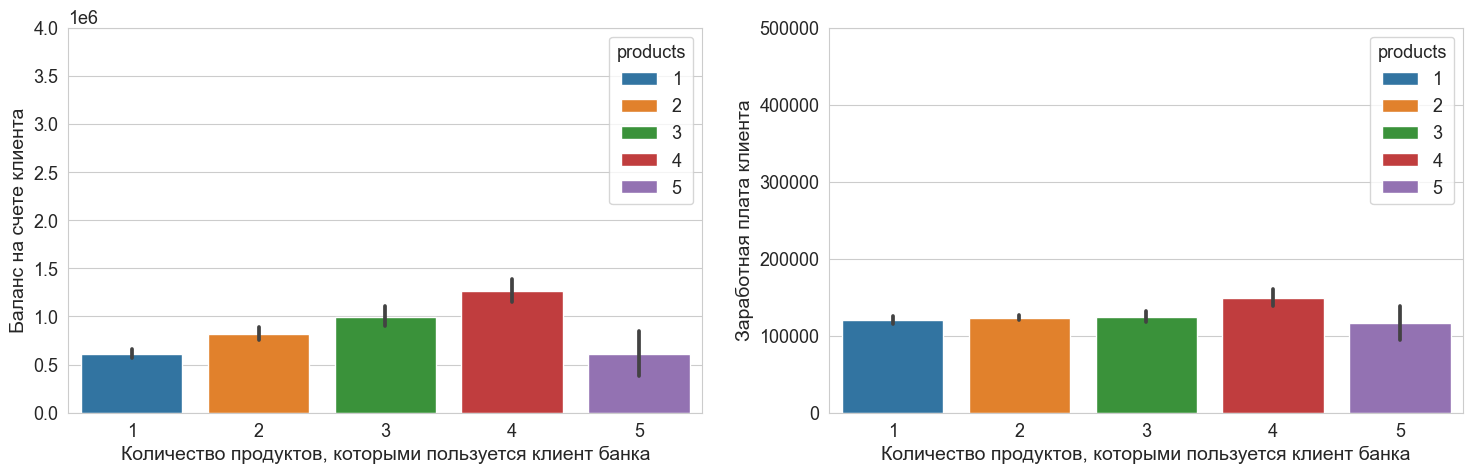

In [41]:
products_balance = data.pivot_table(index=['balance', 'est_salary', 'products'], values='userid', aggfunc='count').reset_index()
products_balance

sns.set_style('whitegrid')
plt.rc('font', size=13)
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
balance = sns.barplot(data=products_balance, x='products', y='balance', hue='products', dodge=False, ax=ax[0])
est_salary = sns.barplot(data=products_balance, x='products', y='est_salary', hue='products',dodge=False, ax=ax[1])
balance.set_ylim(0, 4000000)
balance.set_xlabel('Количество продуктов, которыми пользуется клиент банка', fontsize = 14)
balance.set_ylabel('Баланс на счете клиента', fontsize = 14)
est_salary.set_ylim(0, 500000)
est_salary.set_xlabel('Количество продуктов, которыми пользуется клиент банка', fontsize = 14)
est_salary.set_ylabel('Заработная плата клиента', fontsize = 14)
plt.show()

In [42]:
data.corr()

userid     score    gender       age    equity   balance  \
userid         1.000000  0.009446  0.030109  0.016653  0.004457  0.006406   
score          0.009446  1.000000  0.010895 -0.012069  0.065689  0.235699   
gender         0.030109  0.010895  1.000000 -0.212113 -0.021094  0.051914   
age            0.016653 -0.012069 -0.212113  1.000000  0.019717  0.070075   
equity         0.004457  0.065689 -0.021094  0.019717  1.000000  0.164021   
balance        0.006406  0.235699  0.051914  0.070075  0.164021  1.000000   
products      -0.004509 -0.003453 -0.022201  0.017583  0.431213  0.075735   
credit_card    0.003971 -0.095473  0.126285 -0.122743 -0.167362 -0.059313   
last_activity -0.031804 -0.030421 -0.013399 -0.008386 -0.001324  0.025061   
est_salary    -0.000729  0.164885  0.081470 -0.039127 -0.171123  0.339655   
churn         -0.010774  0.105935  0.141584 -0.050431  0.270326  0.085343   
Ростов        -0.032927 -0.037993 -0.015427  0.047456  0.035034 -0.036063   
Рыбинск        0.013268 -0.000708 -0.011795  0.028026 -0.003863 -0.034309   
Ярославль      0.011482  0.027660  0.021586 -0.058967 -0.021442  0.057189   

               products  credit_card  last_activity  est_salary     churn  \
userid        -0.004509     0.003971      -0.031804   -0.000729 -0.010774   
score         -0.003453    -0.095473      -0.030421    0.164885  0.105935   
gender        -0.022201     0.126285      -0.013399    0.081470  0.141584   
age            0.017583    -0.122743      -0.008386   -0.039127 -0.050431   
equity         0.431213    -0.167362      -0.001324   -0.171123  0.270326   
balance        0.075735    -0.059313       0.025061    0.339655  0.085343   
products       1.000000    -0.252114       0.038298   -0.117290  0.301979   
credit_card   -0.252114     1.000000      -0.033988    0.036390 -0.130507   
last_activity  0.038298    -0.033988       1.000000    0.002247  0.169776   
est_salary    -0.117290     0.036390       0.002247    1.000000  0.001383   
churn          0.301979    -0.130507       0.169776    0.001383  1.000000   
Ростов        -0.007001    -0.098442       0.006974   -0.106645  0.004709   
Рыбинск       -0.043868    -0.050683       0.049664   -0.055340 -0.029527   
Ярославль      0.044450     0.115620      -0.049646    0.125645  0.023218   

                 Ростов   Рыбинск  Ярославль  
userid        -0.032927  0.013268   0.011482  
score         -0.037993 -0.000708   0.027660  
gender        -0.015427 -0.011795   0.021586  
age            0.047456  0.028026  -0.058967  
equity         0.035034 -0.003863  -0.021442  
balance       -0.036063 -0.034309   0.057189  
products      -0.007001 -0.043868   0.044450  
credit_card   -0.098442 -0.050683   0.115620  
last_activity  0.006974  0.049664  -0.049646  
est_salary    -0.106645 -0.055340   0.125645  
churn          0.004709 -0.029527   0.023218  
Ростов         1.000000 -0.246466  -0.489496  
Рыбинск       -0.246466  1.000000  -0.724461  
Ярославль     -0.489496 -0.724461   1.000000

У столбца "баланс на счёте" не найдено высоко коррелирующих признаков

In [43]:
data_0=data[data['balance'].isnull() == True]
data_0

userid  score  gender   age  equity  balance  products  credit_card  \
2     120722  892.0       0  30.0       0      NaN         1            1   
9     133130  906.0       0  67.0       0      NaN         1            0   
10    148929  927.0       1  52.0       0      NaN         1            1   
11    172184  921.0       1  41.0       0      NaN         1            1   
19    127034  922.0       0  53.0       0      NaN         1            0   
...      ...    ...     ...   ...     ...      ...       ...          ...   
9976  208085  876.0       1  38.0       0      NaN         1            0   
9984  125941  729.0       0  42.0       0      NaN         1            1   
9993  219924  884.0       0  36.0       0      NaN         1            1   
9996  139170  894.0       1  46.0       0      NaN         1            1   
9997  115639  903.0       1  24.0       0      NaN         2            1   

      last_activity  est_salary  churn   all_city  Ростов  Рыбинск  Ярославль  
2                 1   107683.34      0    Рыбинск       0        1          0  
9                 1   238055.53      0  Ярославль       0        0          1  
10                1   196820.07      0     Ростов       1        0          0  
11                1   217469.48      0     Ростов       1        0          0  
19                0   147094.82      0    Рыбинск       0        1          0  
...             ...         ...    ...        ...     ...      ...        ...  
9976              0   171763.69      0     Ростов       1        0          0  
9984              1   687538.70      0  Ярославль       0        0          1  
9993              1   169844.88      0    Рыбинск       0        1          0  
9996              0   196898.29      0  Ярославль       0        0          1  
9997              1   108905.09      0  Ярославль       0        0          1  

[2259 rows x 15 columns]

In [44]:
data_0['equity'].value_counts(normalize=True)

0    0.949535
1    0.050465
Name: equity, dtype: float64

In [45]:
data_0['products'].value_counts(normalize=True)

1    0.850376
2    0.137229
3    0.012395
Name: products, dtype: float64

In [46]:
data_0['gender'].value_counts(normalize=True)

1    0.559097
0    0.440903
Name: gender, dtype: float64

In [47]:
data_0['credit_card'].value_counts(normalize=True)

1    0.815848
0    0.184152
Name: credit_card, dtype: float64

**<p>Вывод по второй части:<p/>**
Подготовили данные для дальнейшего анализа, а именно:
- проверили данные на отсутствие пропусков/дубликатов, пропуски в столбце "возраст" не стала убирать ввиду незначитьельного влияния на датасет (0,26%), пропуски в столбце "баланс на счете" убирать не стала, тк данную необходимо понять природу пропусков, связаться для уточнения с заказчиком;
- привели названия столбцов "змеиному" регистру;
- привели столбцы "пол" и "город" к бинарному виду, выделили в отельные столбцы города (Ростов, Рыбинск,  Ярослвль)
- дополнительно (для анализа отточнх клиентов) выделили столбец "возрастной интервал".

# Исследовательский анализ данных

In [48]:
data.describe()

userid        score       gender          age       equity  \
count    9926.000000  9926.000000  9926.000000  9922.000000  9926.000000   
mean   171741.484284   848.724562     0.500907    42.725559     2.634596   
std     33697.332289    65.386276     0.500024    12.172175     1.979382   
min     94561.000000   642.000000     0.000000    18.000000     0.000000   
25%    142715.000000   802.000000     0.000000    33.000000     0.000000   
50%    172654.000000   853.000000     1.000000    40.000000     3.000000   
75%    201161.750000   900.000000     1.000000    51.000000     4.000000   
max    229145.000000  1000.000000     1.000000    86.000000     9.000000   

            balance     products  credit_card  last_activity    est_salary  \
count  7.667000e+03  9926.000000  9926.000000    9926.000000  9.926000e+03   
mean   8.289016e+05     1.871751     0.679931       0.523574  1.479038e+05   
std    1.985272e+06     0.792772     0.466526       0.499469  1.393674e+05   
min    0.000000e+00     1.000000     0.000000       0.000000  2.546300e+03   
25%    2.952611e+05     1.000000     0.000000       0.000000  7.525207e+04   
50%    5.248943e+05     2.000000     1.000000       1.000000  1.197154e+05   
75%    9.808015e+05     2.000000     1.000000       1.000000  1.746796e+05   
max    1.191136e+08     5.000000     1.000000       1.000000  1.395064e+06   

             churn       Ростов      Рыбинск    Ярославль  
count  9926.000000  9926.000000  9926.000000  9926.000000  
mean      0.183256     0.142756     0.267278     0.589966  
std       0.386896     0.349842     0.442561     0.491864  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     1.000000  
75%       0.000000     0.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000     1.000000

Посмотрим на средние значения в двух группах — тех, кто ушел в отток и тех, кто остался:

In [49]:
display(data.groupby(['churn']).mean())

userid       score    gender        age    equity       balance  \
churn                                                                           
0      171913.450228  845.443691  0.467374  43.016288  2.381152  7.348230e+05   
1      170975.058824  863.346894  0.650357  41.429593  3.764156  1.133993e+06   

       products  credit_card  last_activity     est_salary    Ростов  \
churn                                                                  
0      1.758357     0.708770       0.483409  147812.485793  0.141976   
1      2.377130     0.551402       0.702584  148310.728202  0.146234   

        Рыбинск  Ярославль  
churn                       
0      0.273467   0.584557  
1      0.239692   0.614074

In [50]:
display(data.groupby(['gender']).mean())

userid      score        age    equity        balance  \
gender                                                                 
0       170725.115059  848.01090  45.311995  2.676423  729140.185313   
1       172754.173974  849.43564  40.148491  2.592920  935360.423111   

        products  credit_card  last_activity     est_salary     churn  \
gender                                                                  
0       1.889382     0.620912       0.530279  136529.538397  0.128381   
1       1.854183     0.738737       0.516895  159236.867196  0.237932   

          Ростов   Рыбинск  Ярославль  
gender                                 
0       0.148163  0.272507   0.579330  
1       0.137369  0.262068   0.600563

Характерные закономерности, выявленные в ходе изучения данных выше:

 - Клиенты мужского пола более склоны к оттоку чем женщины;
 - Из Ярославля самый большой отток клиентов;


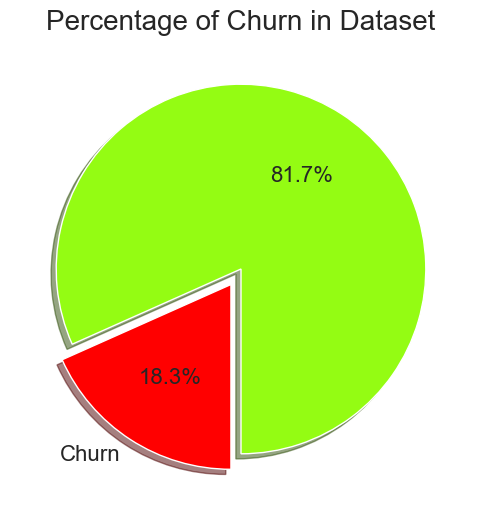

In [51]:
# Визуализируем процент оттока

from pylab import rcParams

# Data to plot
sizes = data['churn'].value_counts(sort = True)
colors = ["#94fc13","#ff0000"] 
labels = '', 'Churn'
explode = (0, 0.1)
rcParams['figure.figsize'] = 6,6

# Plot
plt.pie(sizes, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=270, textprops={'fontsize': 16})

plt.title('Percentage of Churn in Dataset', fontdict = {'fontsize' : 20})
plt.show()

**Средние значения относительно оттока.**
Построим распределение признаков у тех, кто ушел и тех, кто остался.

In [52]:
sns.set_theme(style="darkgrid")
sns.set_palette(['cornflowerblue','green'])

In [53]:
def function_hist(data,column):
    'Функция строит гистограмму распределения колонки column из датафрейма data'
    sns.histplot(data,hue='churn',x=column, stat='density',common_norm=False, palette ='flag')
    plt.title('Распределение '+name, fontsize=13)
    plt.xlabel(name)
    plt.ylabel('Распределение')
    plt.show()

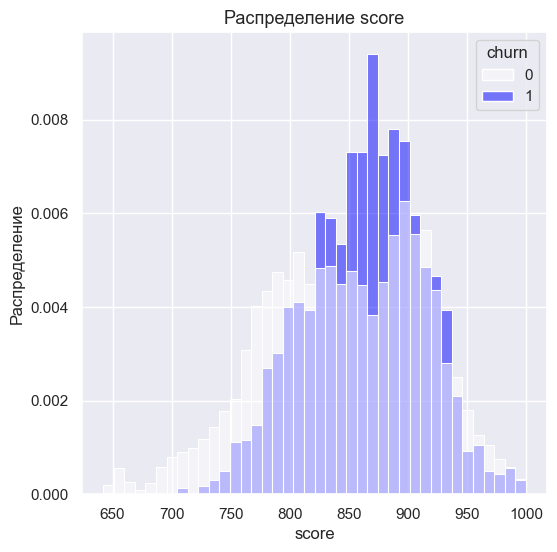

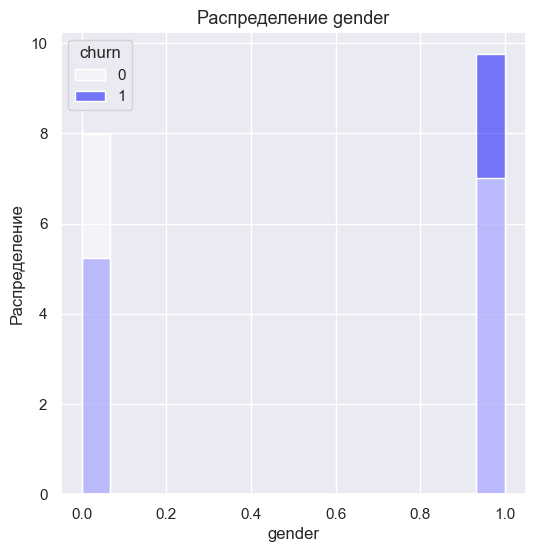

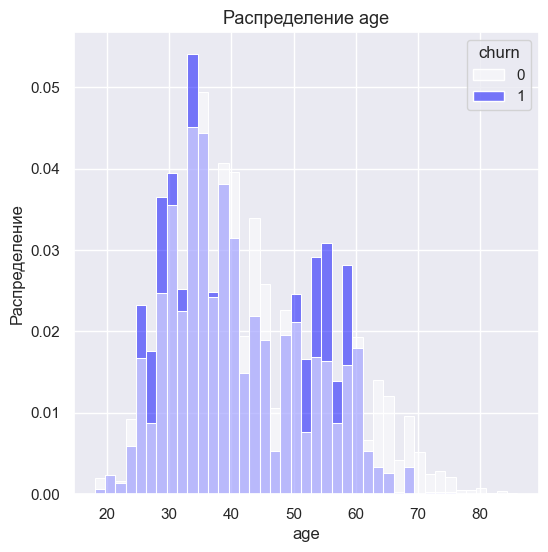

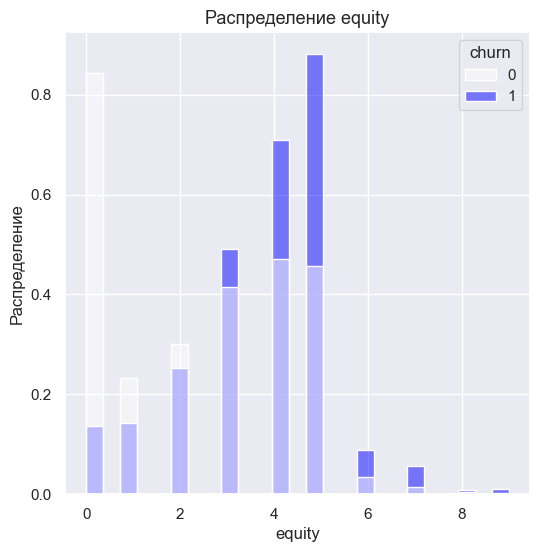

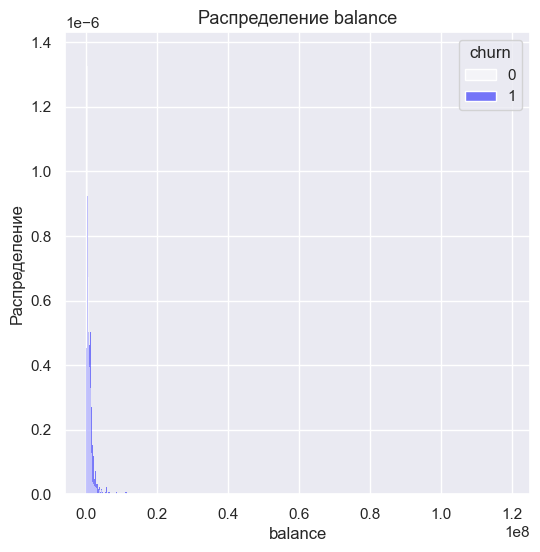

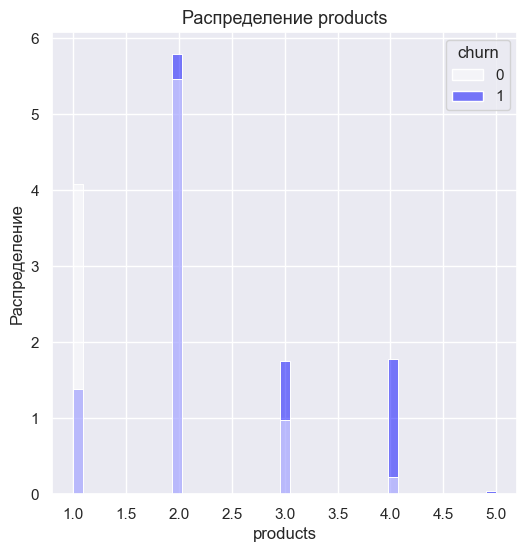

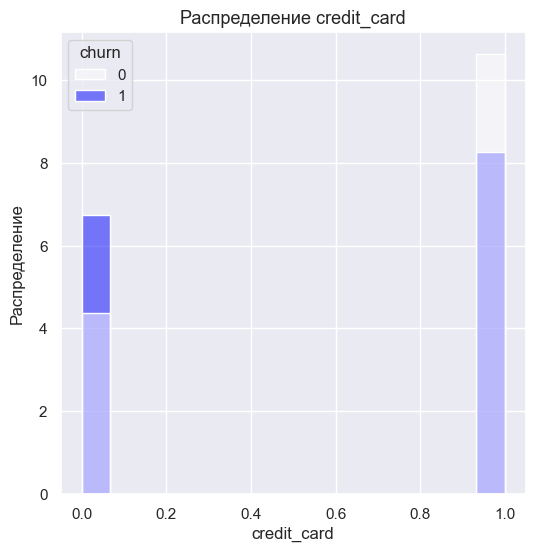

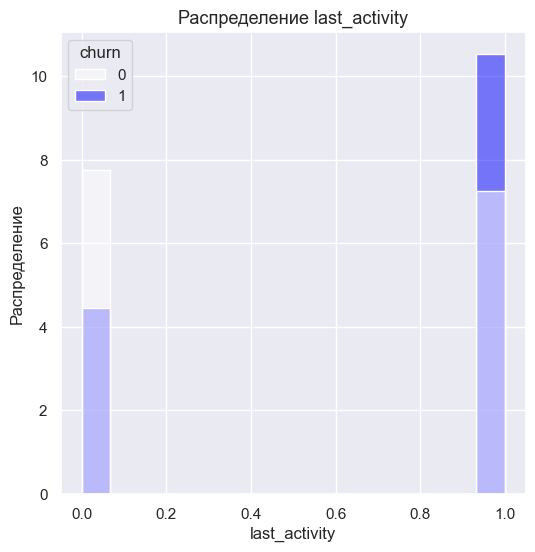

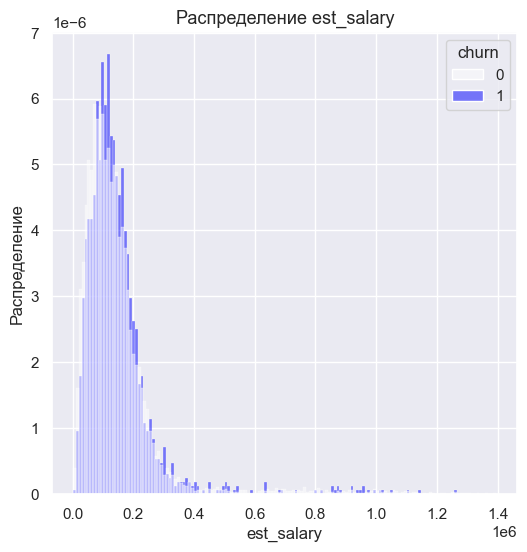

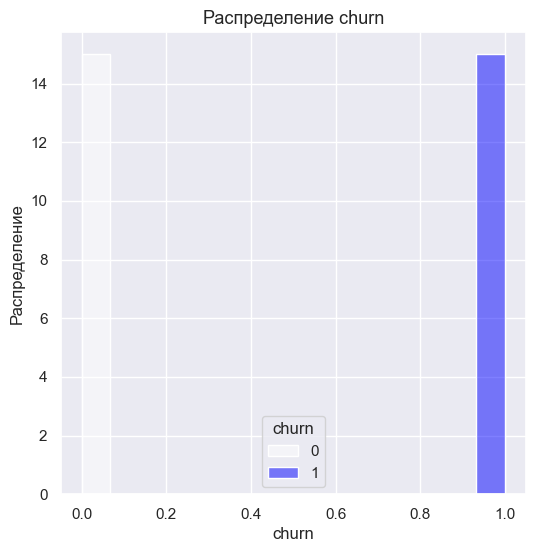

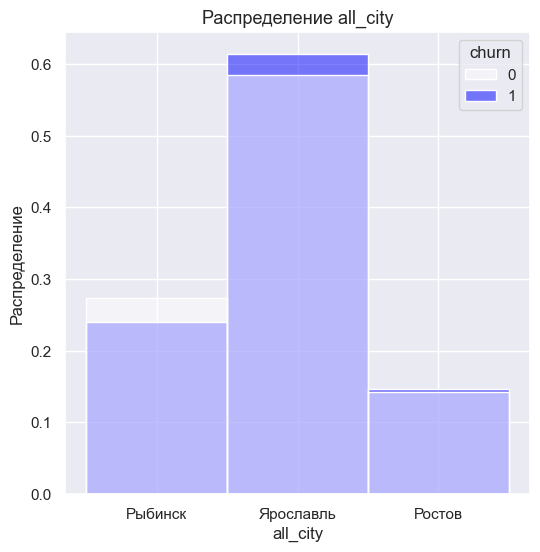

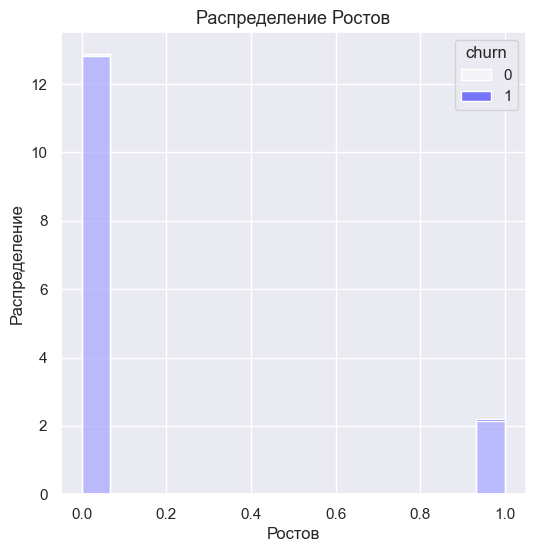

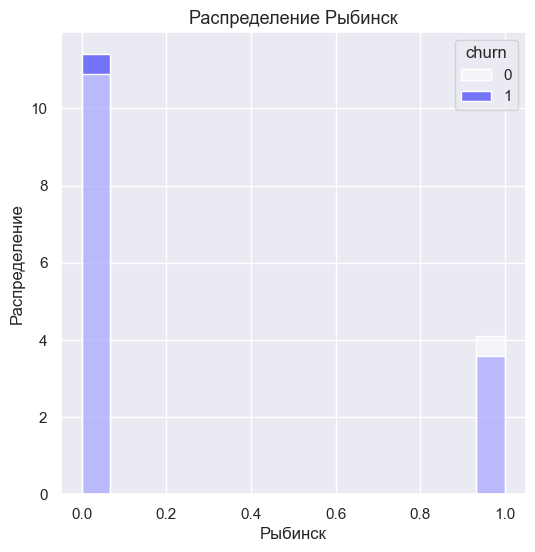

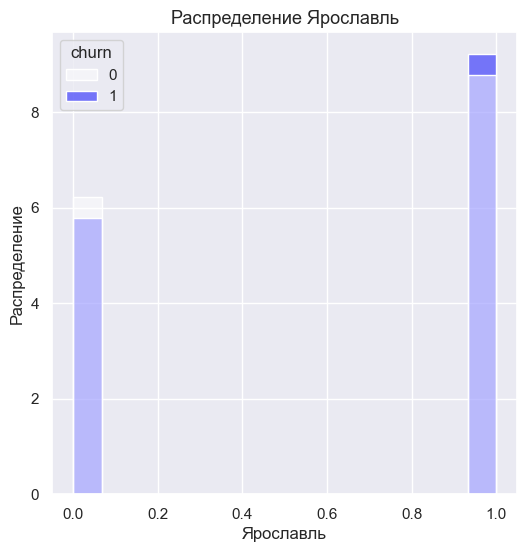

In [54]:
for name in data.columns[1:15]:
    function_hist(data,name)

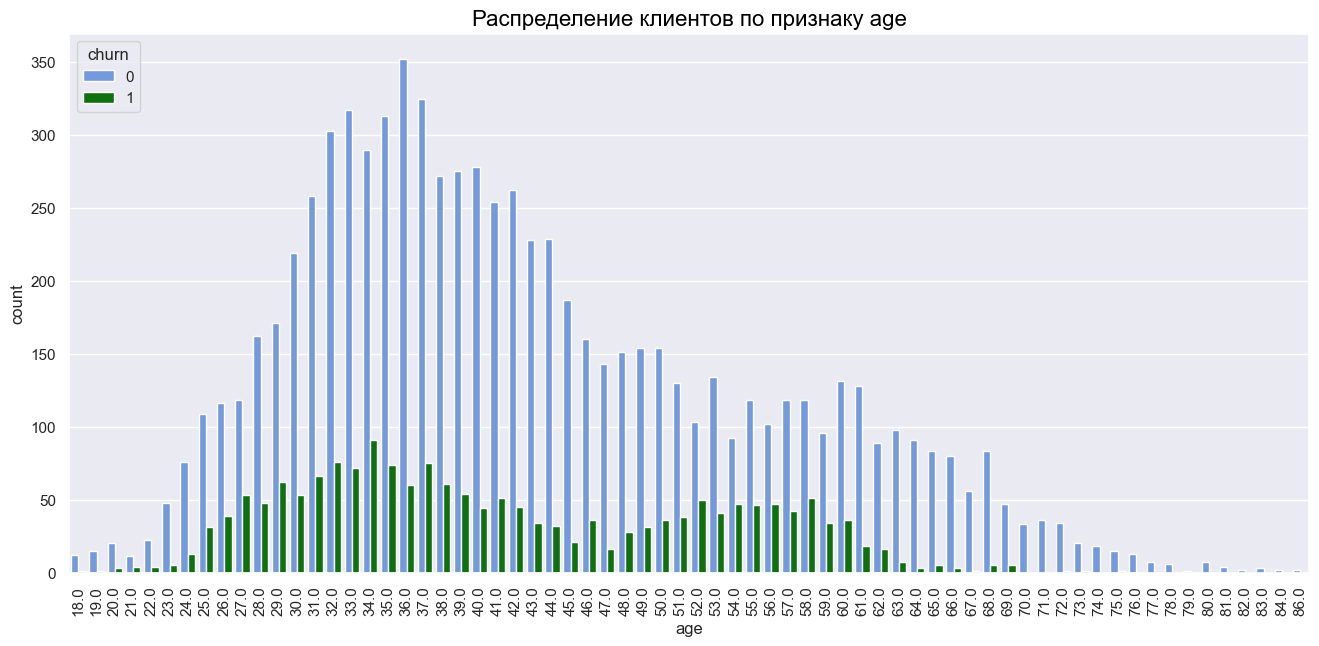

In [55]:
plt.figure(figsize=(16,7))
sns.countplot(data=data, x='age', hue='churn');
plt.title('Распределение клиентов по признаку age', fontsize = 16, color = 'black')
plt.xticks(rotation=90)
plt.show()

Отточными клиентами является клиенты в возрасте с 24-35, 51-60.

В соответсвии с диаграммой выше выделим возрастные группы для дальнейшего анализа

In [56]:
def age_range(age):
    try:
        if age <= 29:
            return 'молодежь'
        elif 30 <= age <= 44:
            return 'зрелый'
        elif 45 <= age <= 59:
            return 'средний'
        elif 60 <= age <= 74:
            return 'пожилой'
        elif age >= 75:
            return 'старческий'
    except:
        pass
    
data['age_range'] = data['age'].apply(age_range)

# посмотрим датафрейм
data.head(10)

userid  score  gender   age  equity     balance  products  credit_card  \
0  183012  850.0       0  25.0       1    59214.82         2            0   
1  146556  861.0       0  37.0       5   850594.33         3            1   
2  120722  892.0       0  30.0       0         NaN         1            1   
3  225363  866.0       0  51.0       5  1524746.26         2            0   
4  157978  730.0       1  34.0       5      174.00         1            1   
5  202305  856.0       1  56.0       4   863687.24         3            1   
6  177259  807.0       0  39.0       3   405042.44         3            0   
7  218868  825.0       0  38.0       4   458145.40         2            1   
8  211686  923.0       1  54.0       5  1206337.87         2            1   
9  133130  906.0       0  67.0       0         NaN         1            0   

   last_activity  est_salary  churn   all_city  Ростов  Рыбинск  Ярославль  \
0              1    75719.14      1    Рыбинск       0        1          0   
1              0    86621.77      0    Рыбинск       0        1          0   
2              1   107683.34      0    Рыбинск       0        1          0   
3              1   174423.53      1  Ярославль       0        0          1   
4              0    67353.16      1  Ярославль       0        0          1   
5              0   156619.80      0    Рыбинск       0        1          0   
6              1   103838.32      0  Ярославль       0        0          1   
7              1    68085.48      0  Ярославль       0        0          1   
8              0   155371.79      0  Ярославль       0        0          1   
9              1   238055.53      0  Ярославль       0        0          1   

  age_range  
0  молодежь  
1    зрелый  
2    зрелый  
3   средний  
4    зрелый  
5   средний  
6    зрелый  
7    зрелый  
8   средний  
9   пожилой

По построенным гистограммам можно сделать промежуточный вывод:

 - Почти все пользователи с количеством продуктов 4 ушли. Пользователи с количеством продуктов 1 уходят реже всего
 - пользователи с 1 last_activity уходят чаще
 - в среднем уходят пользователи 24-35,51-60

 - мужчины уходят заметно чаще женщин
 - больше всего отток клиентов с более 4-5 баллами собственности 

In [57]:
data_01=data.query('balance<2000000')

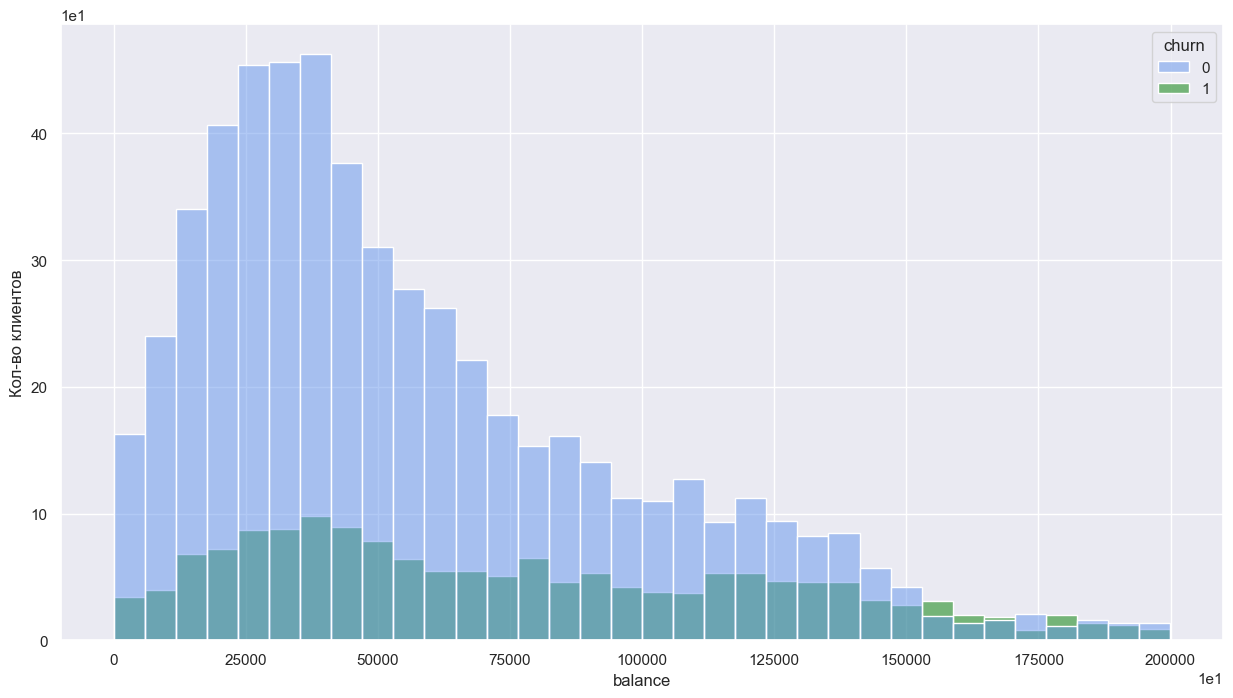

In [58]:
plt.figure(figsize =(15,8))
sns.histplot(x='balance', data=data_01, hue='churn')

plt.ylabel('Кол-во клиентов')
plt.ticklabel_format(axis='both', style='sci', scilimits=(1,1))

plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

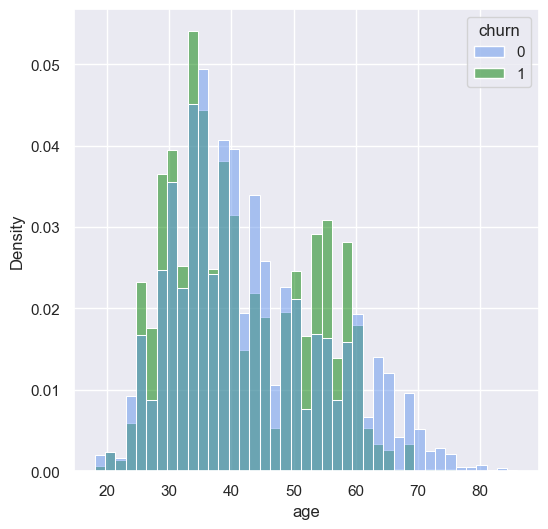

In [59]:
sns.histplot(x='age', data=data, hue='churn', common_norm = False, stat='density')

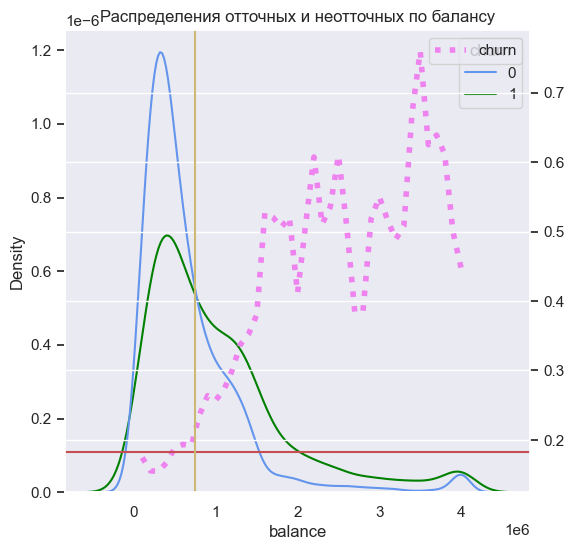

In [60]:
df_temp = data.assign(balance = data.balance.clip(0,4e6))
ax = sns.kdeplot(data = df_temp, x = 'balance', hue = 'churn', common_norm=False)
ax.set(title=f"Распределения отточных и неотточных по балансу")
ax2 = ax.twinx()
df_temp.assign(balance = df_temp.balance.round(-5)).groupby('balance')\
       .agg({'churn':'mean'}).rolling(2).mean()\
       .plot(ax=ax2,color="violet",ls=":",lw=4)\
       .axhline(df_temp.churn.mean(),c='r')
ax2.axvline(7.5e5,c='y')
ax.grid(False,'both','both');

- Чем выше баланс, тем меньше разница между отточенными и неотточными
- Основная масса клиентов с нулевым или очень маленьким балансом.

In [61]:
data_02=data.query('est_salary<300000')

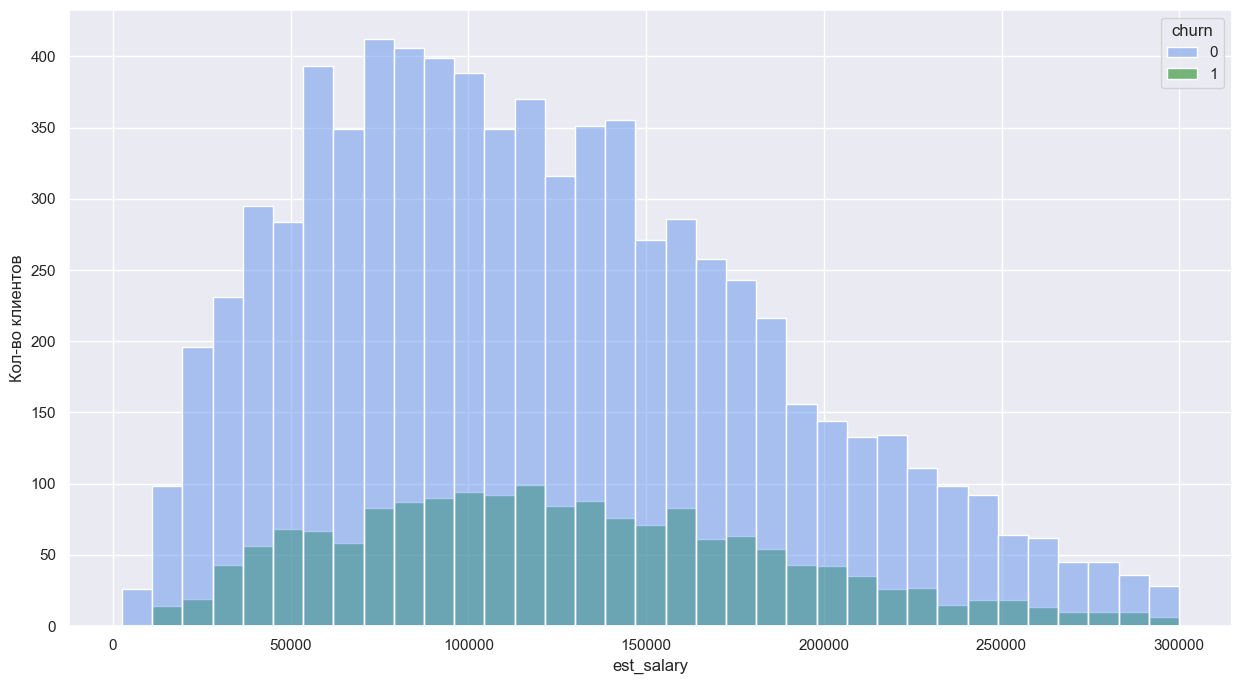

In [62]:
plt.figure(figsize =(15,8))
sns.histplot(x='est_salary', data=data_02, hue='churn')

plt.ylabel('Кол-во клиентов')

plt.show()

Наибольший отток наблюдается у клиентов с зп ~90-110 тыс руб/

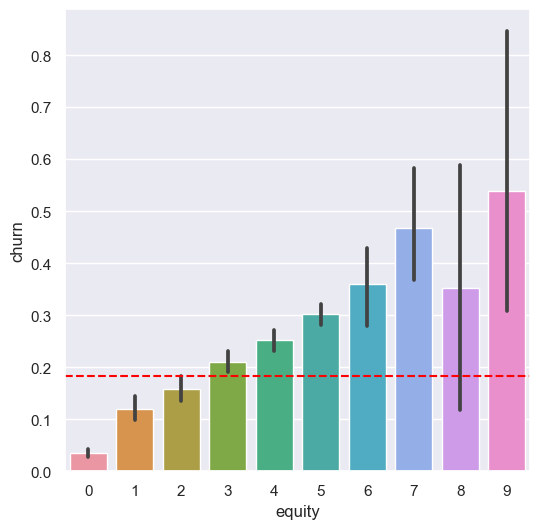

In [63]:
mean_churn=data['churn'].mean()
sns.barplot(x='equity',y='churn',data=data)
plt.axhline(mean_churn, color='red', linestyle='--', label='Средний уровень оттока')

plt.show()

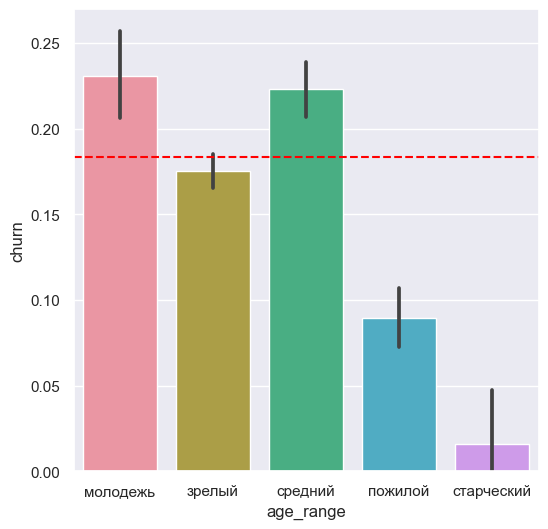

In [64]:
mean_churn=data['churn'].mean()
sns.barplot(x='age_range',y='churn',data=data)
plt.axhline(mean_churn, color='red', linestyle='--', label='Средний уровень оттока')

plt.show()

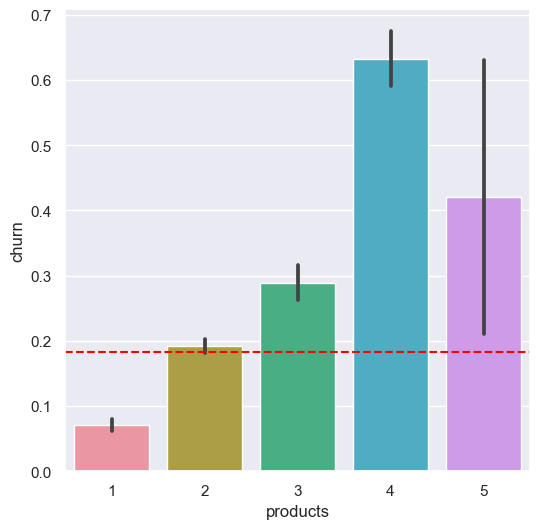

In [65]:
mean_churn=data['churn'].mean()
sns.barplot(x='products',y='churn',data=data)
plt.axhline(mean_churn, color='red', linestyle='--', label='Средний уровень оттока')

plt.show()

In [66]:
data_churn_0=data.query("churn==0")
data_churn_1=data.query("churn==1")

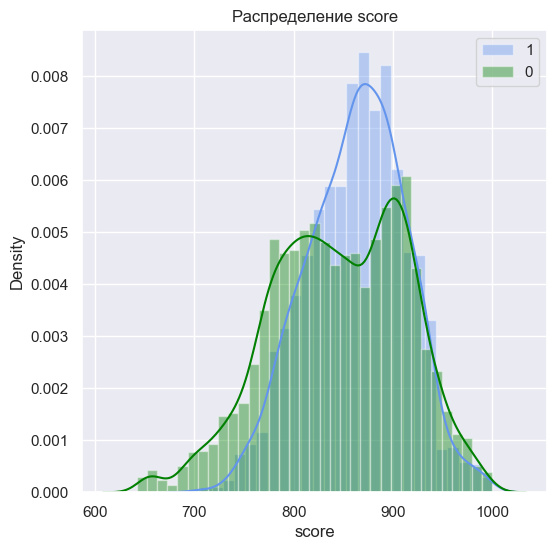

In [67]:
sns.distplot(data_churn_1['score'],label='1')
sns.distplot(data_churn_0['score'],label='0')
plt.title('Распределение score')
plt.legend()
plt.show()

In [68]:
data['score'].min()

642.0

In [69]:
data['score'].max()

1000.0

Объединила скоринговые баллы в рейтинг, так как мин значение по датафрему скорингового балла - 642, удалось согласно информации с портала banki.ru выделить две категории 

In [70]:
def score_rate(age):
    try:
        if age <= 800:
            return 'хороший'
        elif age >= 800:
            return 'отличный'
    except:
        pass
    
data['score_rate'] = data['score'].apply(score_rate)

# посмотрим датафрейм
data.head(10)

userid  score  gender   age  equity     balance  products  credit_card  \
0  183012  850.0       0  25.0       1    59214.82         2            0   
1  146556  861.0       0  37.0       5   850594.33         3            1   
2  120722  892.0       0  30.0       0         NaN         1            1   
3  225363  866.0       0  51.0       5  1524746.26         2            0   
4  157978  730.0       1  34.0       5      174.00         1            1   
5  202305  856.0       1  56.0       4   863687.24         3            1   
6  177259  807.0       0  39.0       3   405042.44         3            0   
7  218868  825.0       0  38.0       4   458145.40         2            1   
8  211686  923.0       1  54.0       5  1206337.87         2            1   
9  133130  906.0       0  67.0       0         NaN         1            0   

   last_activity  est_salary  churn   all_city  Ростов  Рыбинск  Ярославль  \
0              1    75719.14      1    Рыбинск       0        1          0   
1              0    86621.77      0    Рыбинск       0        1          0   
2              1   107683.34      0    Рыбинск       0        1          0   
3              1   174423.53      1  Ярославль       0        0          1   
4              0    67353.16      1  Ярославль       0        0          1   
5              0   156619.80      0    Рыбинск       0        1          0   
6              1   103838.32      0  Ярославль       0        0          1   
7              1    68085.48      0  Ярославль       0        0          1   
8              0   155371.79      0  Ярославль       0        0          1   
9              1   238055.53      0  Ярославль       0        0          1   

  age_range score_rate  
0  молодежь   отличный  
1    зрелый   отличный  
2    зрелый   отличный  
3   средний   отличный  
4    зрелый    хороший  
5   средний   отличный  
6    зрелый   отличный  
7    зрелый   отличный  
8   средний   отличный  
9   пожилой   отличный

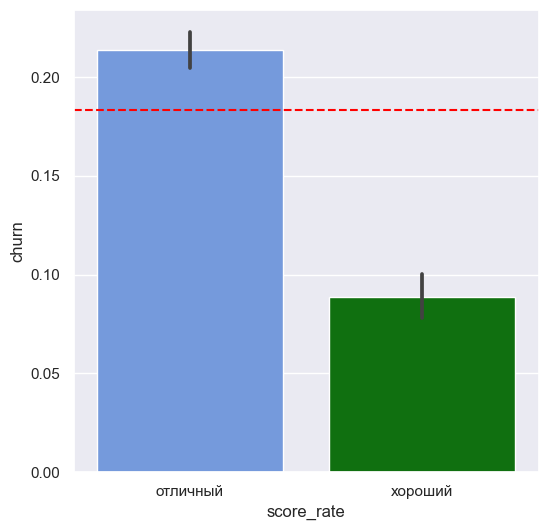

In [71]:
mean_churn=data['churn'].mean()
sns.barplot(x='score_rate',y='churn',data=data)
plt.axhline(mean_churn, color='red', linestyle='--', label='Средний уровень оттока')

plt.show()

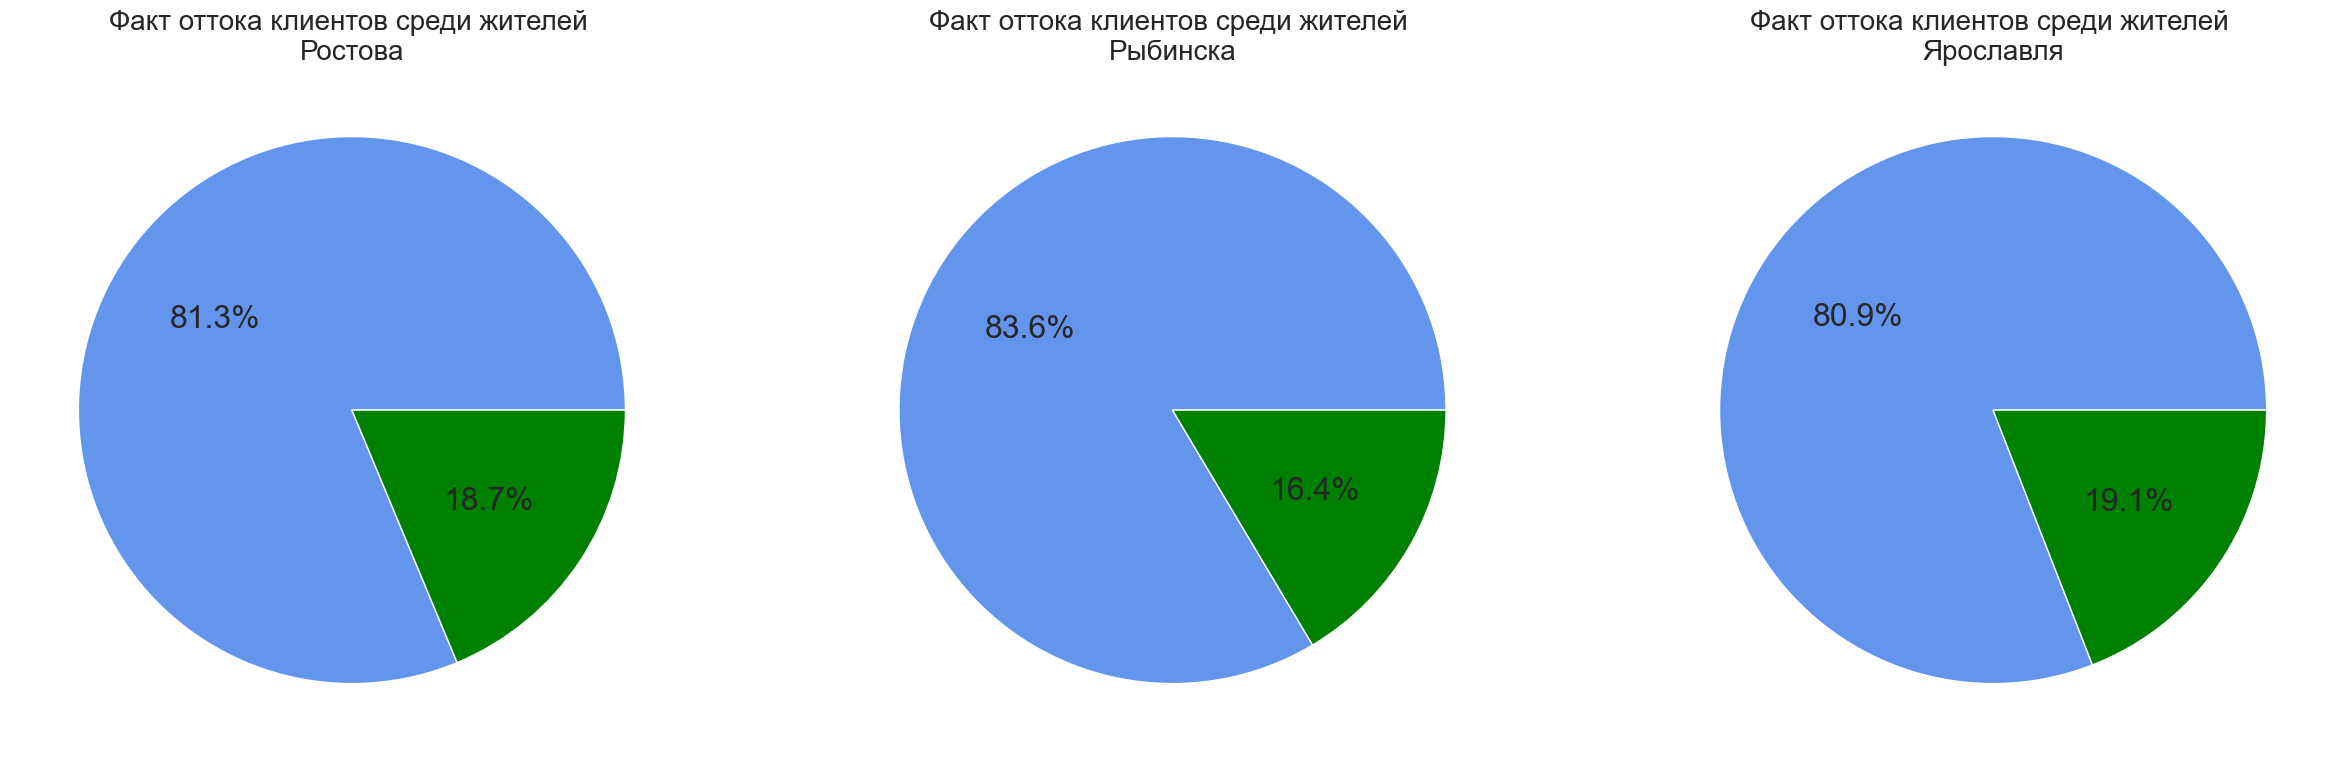

In [72]:
a1 = data.pivot_table(index='churn',columns='Ростов', values='age', aggfunc='count').reset_index()
a2 = data.pivot_table(index='churn',columns='Рыбинск', values='age', aggfunc='count').reset_index()
a3 = data.pivot_table(index='churn',columns='Ярославль', values='age', aggfunc='count').reset_index()


plt.figure(figsize = (30, 30))
def hist(i, k, m, city):
    fig = plt.subplot(1, 3, i + 1)
    plt.pie(x=m[m.columns[k+1]], labels=None, autopct='%1.1f%%', textprops={'fontsize': 23})
    fig.set_title(f'Факт оттока клиентов среди жителей {city}', fontsize=20)    

hist(0, 1, a1, '\nРостова')
hist(1, 1, a2, '\nРыбинска')
hist(2, 1, a3, '\nЯрославля')

plt.show()

from pandas.io.formats.style import Styler
import seaborn as sns

a1 = a1.style.bar(align='mid', vmin=800, vmax=8000, width=100, color='#d65f5f')
a2 = a2.style.bar(align='mid', vmin=400, vmax=7000, width=100, color='#5f5fd6')
a3 = a3.style.bar(align='mid', vmin=800, vmax=5000, width=100, color='#15d451')

display(a1, a2, a3)

<div class="alert alert-success"><b>Комментарий ревьюера&nbsp;<big>✔️</big></b></div>

Больший отток клиентов подтверждается в областном центре - Ярославле (19%) - 1147 пользователей. В городах Ростове и Рыбинске отток составляет 18,7% и 16,3% соответственно. 

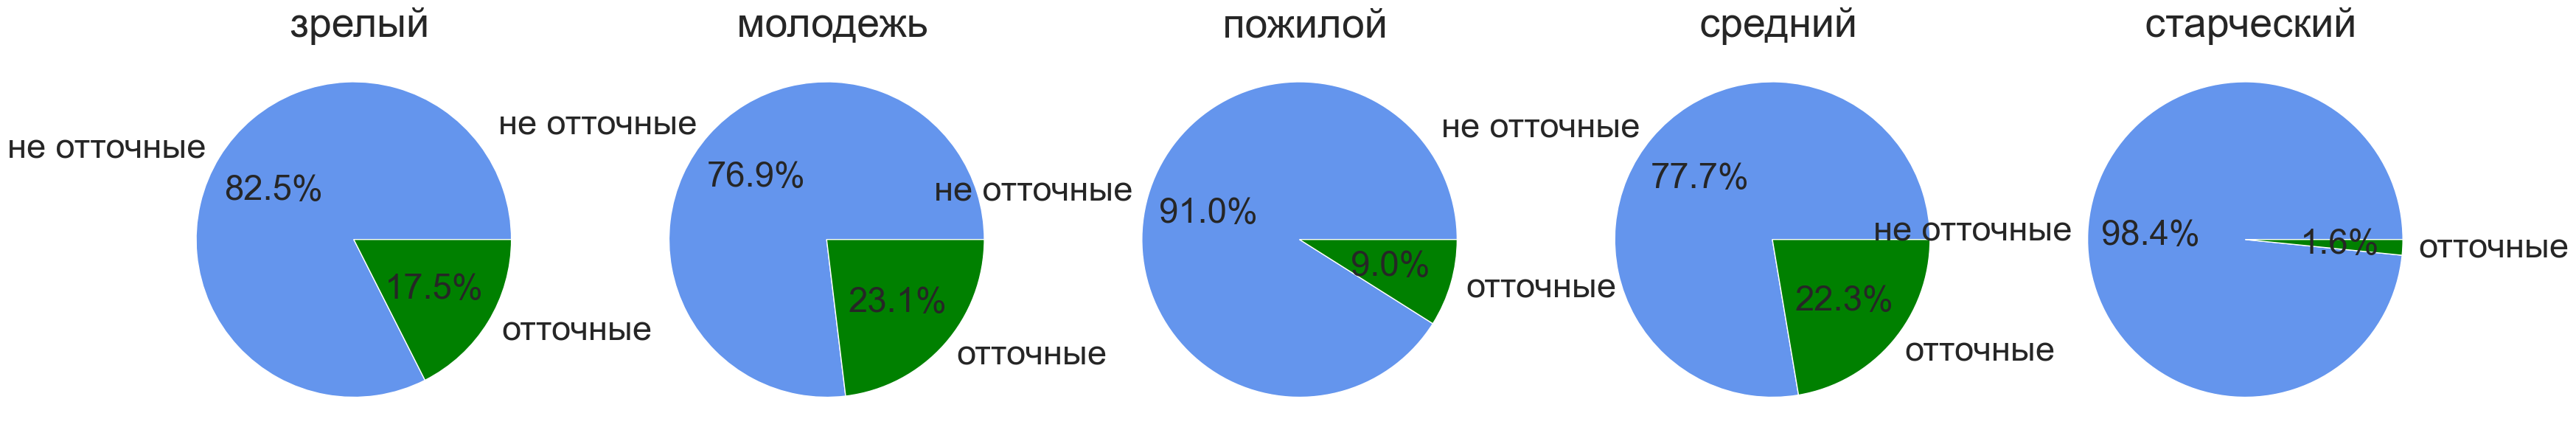

age_range  churn  зрелый  молодежь  пожилой  средний  старческий
0              0    4175       880     1027     1960          62
1              1     888       264      101      564           1

In [73]:
plt.figure(figsize=(40, 40))
t = data.pivot_table(index='churn',columns='age_range',values='age', aggfunc='count').reset_index()

labels=['не отточные', 'отточные']

for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.pie(x=t[t.columns[i+1]], labels=labels, textprops={'fontsize': 34}, autopct='%1.1f%%')
    ax.set_title(f' {t.columns[i+1]}', fontsize=40)

plt.show()
t

Несмотря на небольшое кол-во возрастных клиентов 1128 пользователей у этой группы самый маленький отток- всего 9%.
Самый большой отток у молодых клиентов - 23,1%.


                       Отток клиентов относительно пола в зависимости от значения параметра "last_activity"



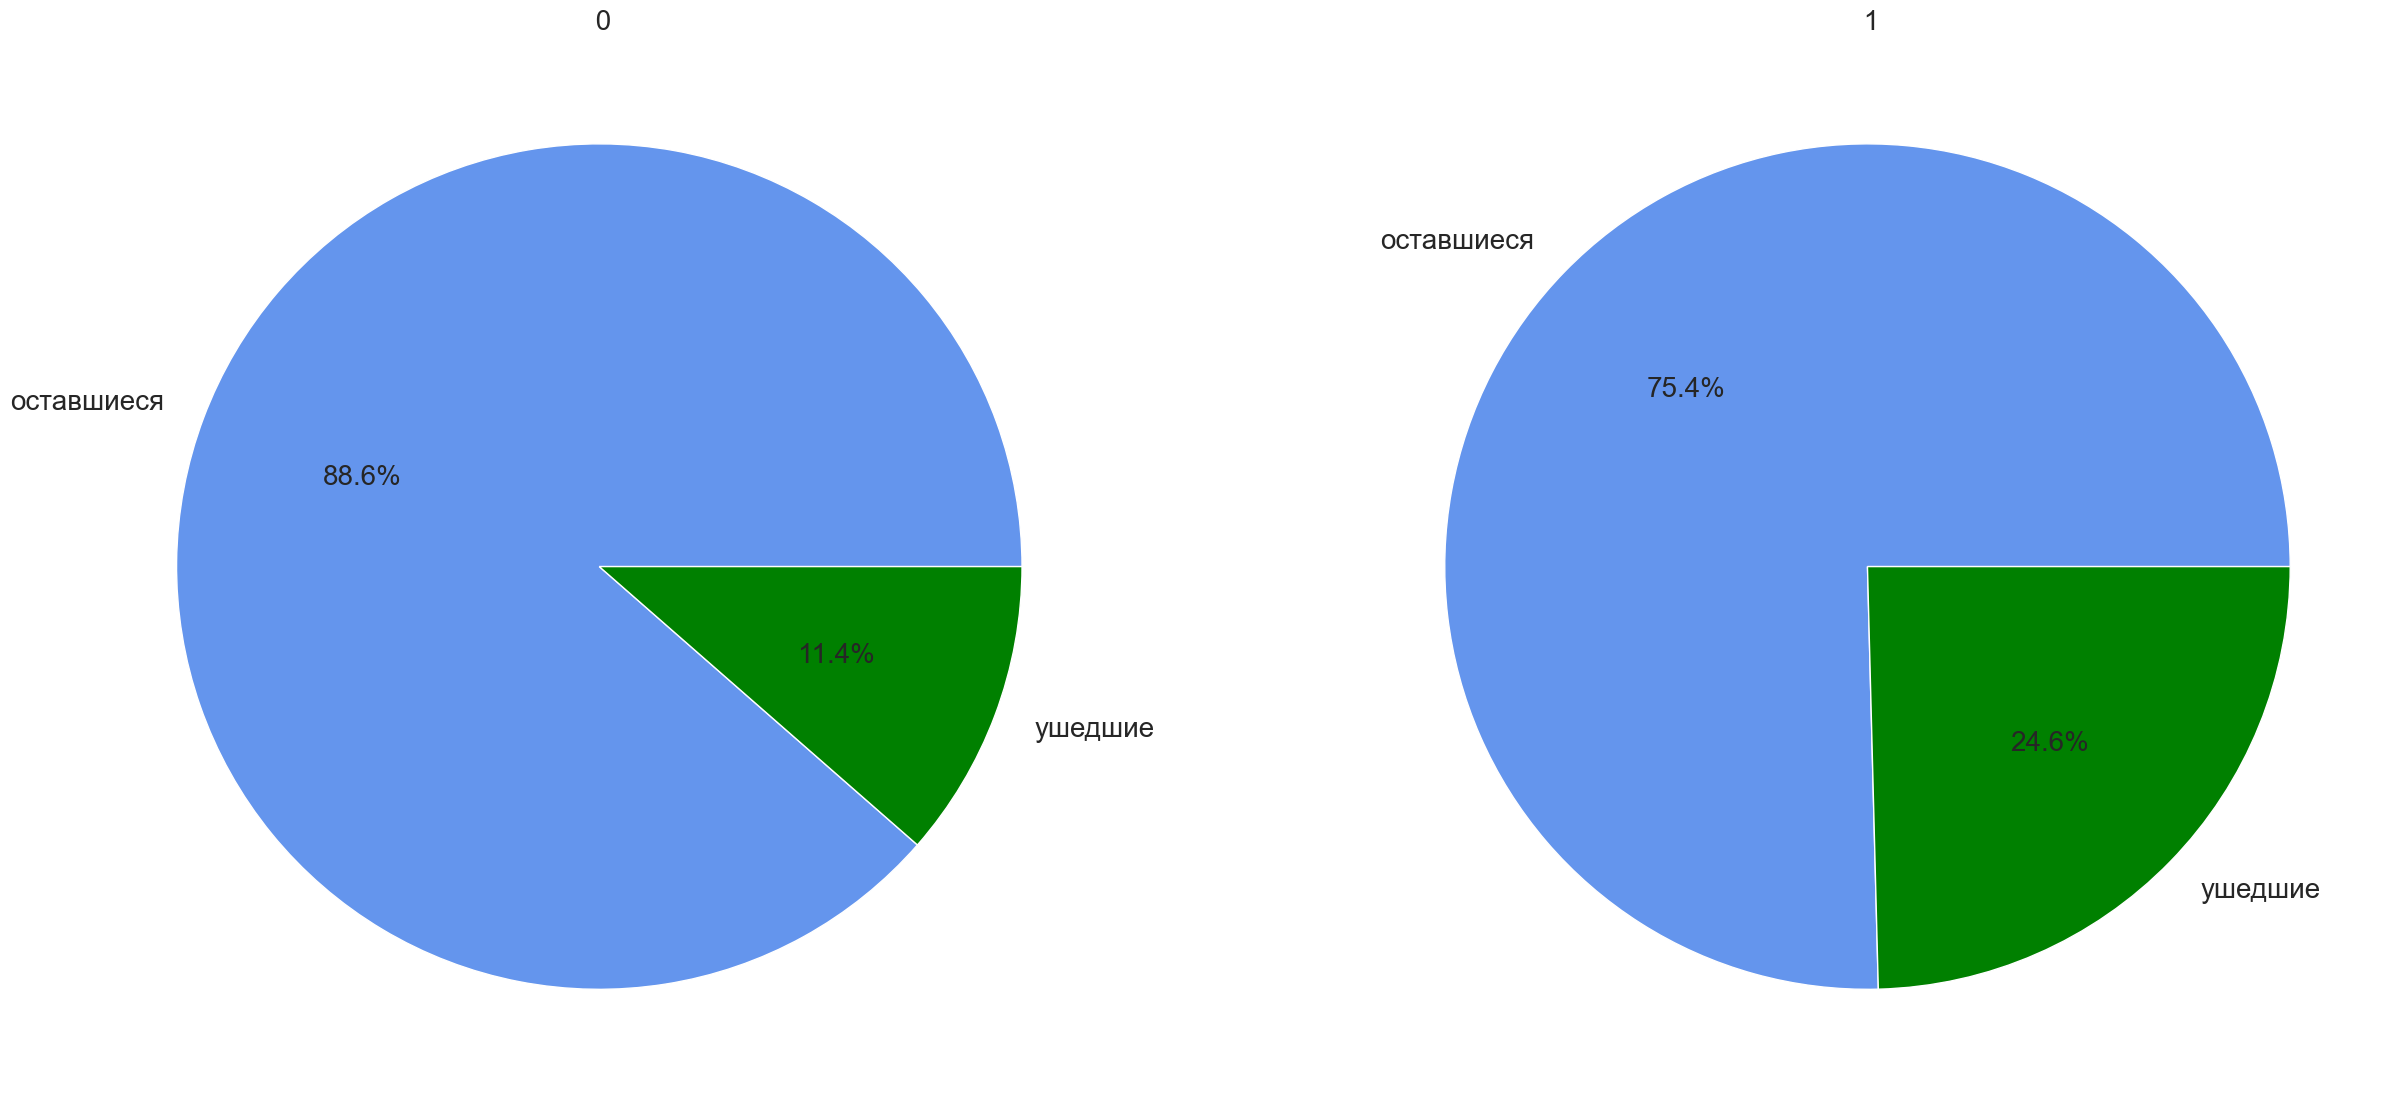

In [74]:
t1 = data.pivot_table(index='churn',columns='last_activity',values='gender', aggfunc='count').reset_index()
labels=['оставшиеся', 'ушедшие']

plt.figure(figsize = (30, 30))

for i in range(2):
    fig = plt.subplot(1, 2, i + 1)
    plt.pie(x=t1[t1.columns[i+1]], labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20})
    fig.set_title(f' {t1.columns[i+1]}', fontsize=20)  
    
print('\n                       Отток клиентов относительно пола в зависимости от значения параметра "last_activity"\n')    
plt.show()

t1.style.bar(align='mid', vmin=600, vmax=5000, width=100)


Среди мужчин подтверждается больший отток по сравнению с клиентами противоположного пола. Разница кол-ва клиентов обоих полов практически на одном уровне, но вместе с тем отток мужчин-клиентов в два раза больше, чем  женщин-клиентов

**Pairplot**

Построим pairplot по нашим данным

In [75]:
#sns.pairplot(data,aspect=.85,hue='churn')

Данная таблица графиков лишний раз подтверждает все промежуточные выводы из гистограмм. Построим матрицу корреляций

**Матрица корреляций**

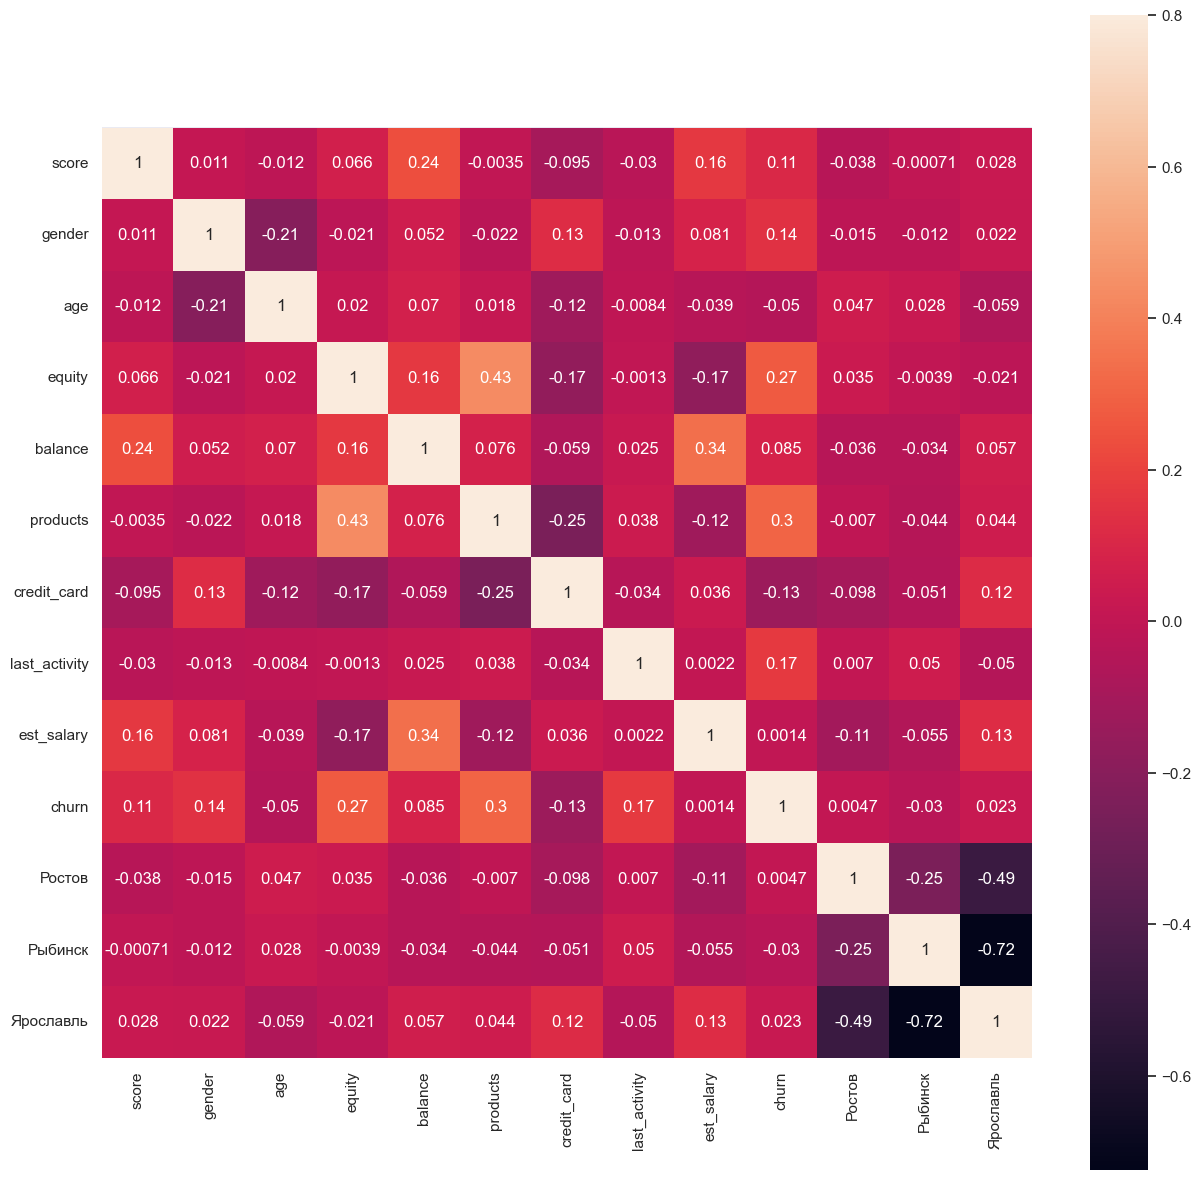

In [76]:
corr_m = data.drop(['userid'], axis=1).corr()
corr_m
# отобразим heatmap
plt.figure(figsize = (15,15))
sns.heatmap(corr_m, square=True, vmax=0.8, annot = True)

plt.show()

Мультиколлинеарности не обнаружено, все признаки незначительно коррелируют друг с другом. С целевой переменной churn больше всего коррелирует products, equity, и last_activity.

**Вывод**

Основная часть клиентов банка находится в городе Ярославль (58,9%); 26,72% пользователей находится в Рыбинске и 14,27% - в Ростове.

Клиенты банка примерно поровну поделены по половому признаку в каждом городе.
Неотточных клиентов – 81,7%, отточных 18,3%.
Анализируя диаграммы отточности клиентов, можно сделать вывод:
- Почти все пользователи с количеством продуктов 4 ушли. Пользователи с количеством продуктов 1 уходят реже всего
- пользователи с 1 last_activity уходят чаще
- в среднем уходят пользователи 24-35,51-60
- Оточными в разрезе скорингового балла являются клиенты имеющие баллы ~860-900
- мужчины уходят заметно чаще женщин
- больше всего отток клиентов с более 4-5 баллами собственности
- оточными клиентами являются клиенты с балансом от 25 до 50 тыс р., также отточными являются клиентами с суммой 80 т.руб.
- Наибольший отток наблюдается у клиентов с зп ~90-110 тыс руб/
- в Ярославле наибольший отток клиентов.

Выделены группы по возрасту, и скоринговому баллу. Данная градация была также выполнена визуально.
Проанализирован отток клиентов в разрезе городов:
- В Ростове отток составляет 18,7%
- В Рыбинске отток составляет 16,7%
- В Ярославле отток составляет 19,1%
В разрезе возрастных групп также был проведен анализ:
- В группе зрелых пользователей % оттока 17,5%(самая большая анализируемая группа – 5063 клиентов)
- В группе молодежь – 23,1% отточных клиентов
- В группе пожилых клиентов % оттока 9%
В разрезе гендера:
- Большее кол-во отточных клиентов – мужчины – 24,6 % при относительно равном кол-ве клиентов между М/Ж.
- Среди женщин % оттока 11,4%.

**Исследование корреляции**
Как видно из матрицы корреляции и тепловой карты все параметры очень слабо или умеррено коррелируют между собой. Прямая слабая корреляция наблюдается между целевым параметром 'churn' и параметром 'products' (0,3). Также 'churn' слабо коррелирует с параметрами 'equity' (0,27), 'last_activity' (0,17), 'gender' (0,14), 'score' (0,11). Обратная слабая корреляция наблюдается между параметрами 'churn' и 'credit_card' (-0,13).


# Сегментация

In [77]:
data.drop(['userid'], axis=1).groupby('churn').mean()

score    gender        age    equity       balance  products  \
churn                                                                      
0      845.443691  0.467374  43.016288  2.381152  7.348230e+05  1.758357   
1      863.346894  0.650357  41.429593  3.764156  1.133993e+06  2.377130   

       credit_card  last_activity     est_salary    Ростов   Рыбинск  \
churn                                                                  
0         0.708770       0.483409  147812.485793  0.141976  0.273467   
1         0.551402       0.702584  148310.728202  0.146234  0.239692   

       Ярославль  
churn             
0       0.584557  
1       0.614074

Посмотрим распределение количества клиентов банка по количеству потребляемых продуктов.

In [78]:
products_user = data.groupby('products')['userid'].count().sort_values(ascending=False).reset_index()

# посмотрим: сколько процентов заведений в каждой категории
all_user = data['userid'].count()
products_user['fraction_products'] = ((products_user['userid'] / all_user) * 100).round(decimals=2)
products_user.sort_values(by='userid', ascending=False)
products_user.reset_index(drop=True)

products  userid  fraction_products
0         2    5099              51.37
1         1    3306              33.31
2         3    1028              10.36
3         4     474               4.78
4         5      19               0.19

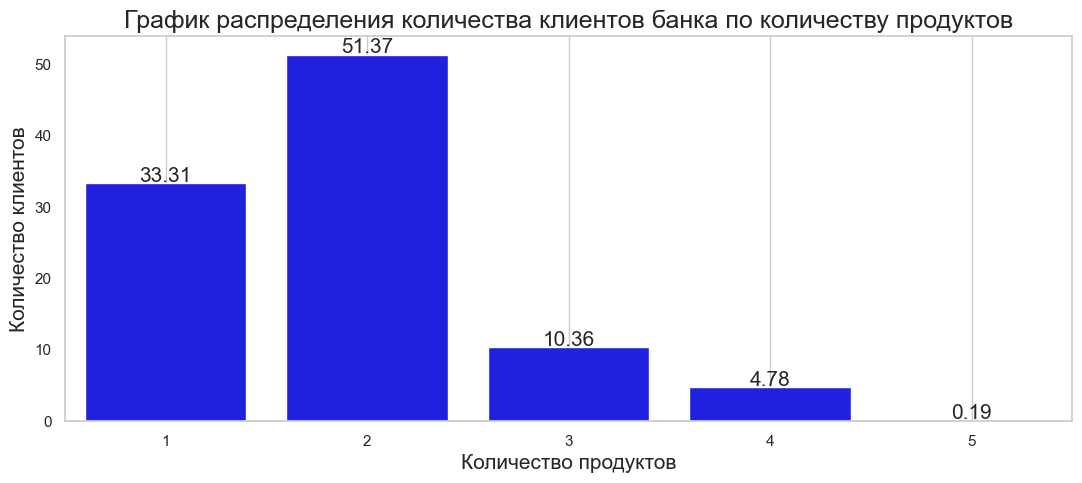

In [79]:
# построим график распределения количества пользователей по количеству продуктов
sns.set_style('whitegrid')
plt.rc('font', size=15)
plt.figure(figsize=(13, 5))
plots = sns.barplot(x='products', y='fraction_products', data=products_user, color='blue')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')
plt.title('График распределения количества клиентов банка по количеству продуктов', fontsize = 18)
plt.xlabel('Количество продуктов', fontsize = 15)
plt.ylabel('Количество клиентов', fontsize = 15)
plt.grid()
plt.show()

Больше всего клиентов банка, которые пользуются двумя продуктами. Они составляют 51,62%. Одним продуктом банка владеют 32,71% пользователей, тремя продуктами - 10,6%, четырьмя - 4,75% и пятью - 0,3% пользователей.

Так как клиентов банка с 3мя, 4мя и 5ю продуктами мало, то объединим их в одну категорию. Добавим в датафрейм 'bank' столбец 'products_new'.

In [80]:
def cat_product(products):
    try:
        if products == 1:
            return 1
        elif products == 2:
            return 2
        elif products >= 3:
            return '3+'
    except:
        pass
    
data['products_new'] = data['products'].apply(cat_product)

# выведем первые 5 строк датафрейма
data.head()

userid  score  gender   age  equity     balance  products  credit_card  \
0  183012  850.0       0  25.0       1    59214.82         2            0   
1  146556  861.0       0  37.0       5   850594.33         3            1   
2  120722  892.0       0  30.0       0         NaN         1            1   
3  225363  866.0       0  51.0       5  1524746.26         2            0   
4  157978  730.0       1  34.0       5      174.00         1            1   

   last_activity  est_salary  churn   all_city  Ростов  Рыбинск  Ярославль  \
0              1    75719.14      1    Рыбинск       0        1          0   
1              0    86621.77      0    Рыбинск       0        1          0   
2              1   107683.34      0    Рыбинск       0        1          0   
3              1   174423.53      1  Ярославль       0        0          1   
4              0    67353.16      1  Ярославль       0        0          1   

  age_range score_rate products_new  
0  молодежь   отличный            2  
1    зрелый   отличный           3+  
2    зрелый   отличный            1  
3   средний   отличный            2  
4    зрелый    хороший            1

In [81]:
def categorize_salary(est_salary):
    try:
        if est_salary <= 24999:
            return 'до 25 тыс'
        elif 25000 <= est_salary <= 49999:
            return 'от 25 до 50 тыс'
        elif 50000 <= est_salary <= 99999:
            return 'от 50 до 100 тыс'
        elif 100000 <= est_salary <= 199999:
            return 'от 100 до 200 тыс'
        elif 200000 <= est_salary <= 299999:
            return 'от 200 до 300 тыс'
        elif est_salary >= 300000:
            return 'свыше 300 тыс'
    except:
        pass
    
data['salary_category'] = data['est_salary'].apply(categorize_salary)

# выведем первые 5 строк датафрейма
data.head()

userid  score  gender   age  equity     balance  products  credit_card  \
0  183012  850.0       0  25.0       1    59214.82         2            0   
1  146556  861.0       0  37.0       5   850594.33         3            1   
2  120722  892.0       0  30.0       0         NaN         1            1   
3  225363  866.0       0  51.0       5  1524746.26         2            0   
4  157978  730.0       1  34.0       5      174.00         1            1   

   last_activity  est_salary  churn   all_city  Ростов  Рыбинск  Ярославль  \
0              1    75719.14      1    Рыбинск       0        1          0   
1              0    86621.77      0    Рыбинск       0        1          0   
2              1   107683.34      0    Рыбинск       0        1          0   
3              1   174423.53      1  Ярославль       0        0          1   
4              0    67353.16      1  Ярославль       0        0          1   

  age_range score_rate products_new    salary_category  
0  молодежь   отличный            2   от 50 до 100 тыс  
1    зрелый   отличный           3+   от 50 до 100 тыс  
2    зрелый   отличный            1  от 100 до 200 тыс  
3   средний   отличный            2  от 100 до 200 тыс  
4    зрелый    хороший            1   от 50 до 100 тыс

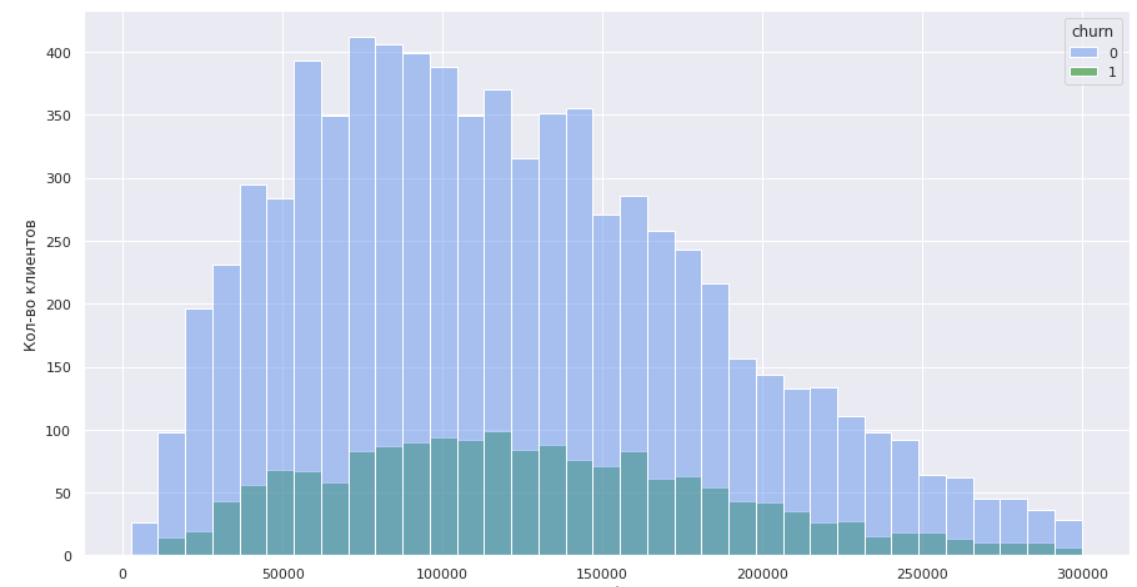

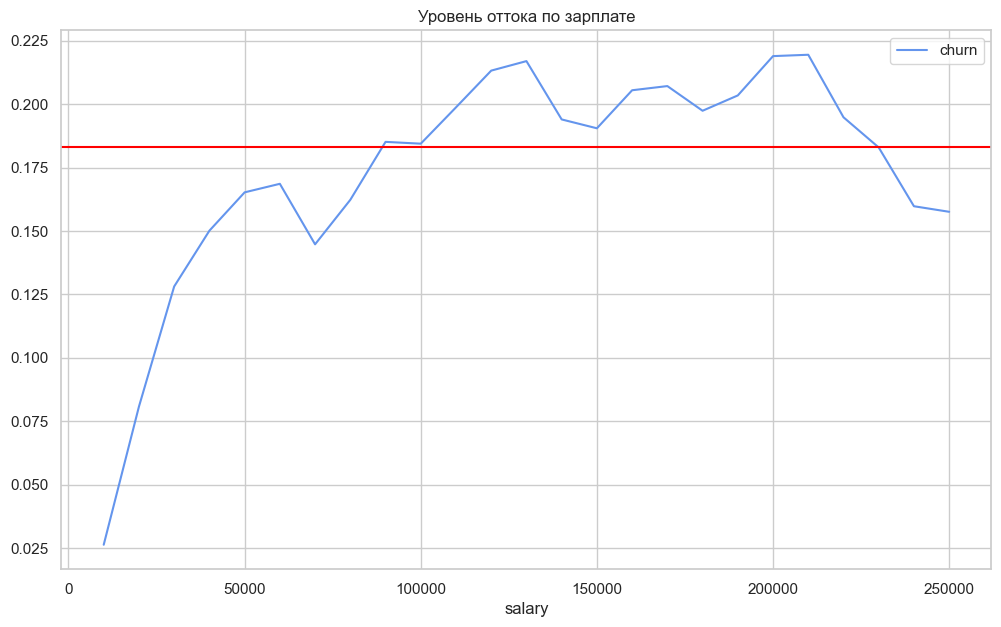

In [82]:
data.assign(salary = data.est_salary.round(-4))\
    .groupby('salary')\
    .agg({'churn':'mean'}).head(26).rolling(2).mean()\
    .plot(kind='line',figsize=(12,7))\
    .axhline(data.churn.mean(),c="red");
plt.title('Уровень оттока по зарплате');

In [83]:
salary_user = data.groupby('salary_category')['userid'].count().sort_values(ascending=False).reset_index()

# посмотрим: сколько процентов пользователей в каждой категории по заработной плате
all_user = data['userid'].count()
salary_user['fraction_salary'] = ((salary_user['userid'] / all_user) * 100).round(decimals=2)
salary_user.sort_values(by='userid', ascending=False)
salary_user.reset_index(drop=True)

salary_category  userid  fraction_salary
0  от 100 до 200 тыс    4280            43.12
1   от 50 до 100 тыс    2712            27.32
2  от 200 до 300 тыс    1180            11.89
3    от 25 до 50 тыс     931             9.38
4      свыше 300 тыс     562             5.66
5          до 25 тыс     261             2.63

Сегментируем клиентов банка по количеству проуктов. Таким образом, у нас получается три сегмента:

 - пользователи с одним банковским продуктом - сегмент 1;
 - пользователи с двумя банковскими продуктами - сегмент 2;
 - пользователи с тремя и более банковскими продуктами - сегмент 3.
 Посмотрим: как распределяются уходящие клиенты банка по полу, возрасту и заработной плате в каждом сегменте.

In [84]:
data.drop(['userid'], axis=1).groupby('gender').mean()

score        age    equity        balance  products  credit_card  \
gender                                                                         
0       848.01090  45.311995  2.676423  729140.185313  1.889382     0.620912   
1       849.43564  40.148491  2.592920  935360.423111  1.854183     0.738737   

        last_activity     est_salary     churn    Ростов   Рыбинск  Ярославль  
gender                                                                         
0            0.530279  136529.538397  0.128381  0.148163  0.272507   0.579330  
1            0.516895  159236.867196  0.237932  0.137369  0.262068   0.600563

In [85]:
# отфильтруем датафрейм по уходящим пользователям
churn = data.query('churn == 1')

In [86]:
# отсортируем датафрейм 'churn' по пользователям в сегменте 1
seg_1 = churn.query('products_new == 1')
segment_1 = seg_1.pivot_table(index=['gender', 'salary_category', 'age_range'], 
                                  values='userid', aggfunc='count').reset_index()
all_user = seg_1['userid'].count()
segment_1['frac_churn'] = ((segment_1['userid'] / all_user) * 100).round(decimals=2)
segment_1.reset_index(drop=True)
# построим диаграмму
fig = (px.sunburst(segment_1, path=['gender', 'salary_category', 'age_range', 'frac_churn'], 
                  values='userid',
                   title='Распределение уходящих клиентов банка по полу, заработной плате и возрасту в сегменте 1'))

fig.show()

В сегменте 1 больше склонны к уходу мужчины зрелого возраста (от 30 до 44 лет) с заработной платой от 100 до 200 тысяч. Они составляют 21.07% от всех клиентов банка, которые пользуются одним продуктом. Также склонны к уходу мужчины зрелого и среднего возраста (от 45 до 59 лет) с заработной платой от 50 до 100 тысяч: 8.94% и 7.23% соответственно. А среди женщин в сегменте 1 склонны к оттоку клиентки зрелого возраста с заработной платой от 100 до 200 тысяч (5.96%) и клиентки среднего возраста с заработной платой от 50 до 100 тысяч (5,11%).

In [87]:
# отсортируем датафрейм 'churn' по пользователям в сегменте 2
seg_2 = churn.query('products_new == 2')
segment_2 = seg_2.pivot_table(index=['gender', 'salary_category', 'age_range'], 
                                  values='userid', aggfunc='count').reset_index()
all_user = seg_2['userid'].count()
segment_2['frac_churn'] = ((segment_2['userid'] / all_user) * 100).round(decimals=2)
segment_2.reset_index(drop=True)
# построим диаграмму
fig = (px.sunburst(segment_2, path=['gender', 'salary_category', 'age_range', 'frac_churn'], 
                  values='userid', 
                   title='Распределение уходящих клиентов банка по полу, заработной плате и возрасту в сегменте 2'))

fig.show()

В сегменте 2 больше склонны к уходу мужчины зрелого возраста (от 30 до 44 лет) и мужчины среднего возраста (от 45 до 59 лет) с заработной платой от 100 до 200 тысяч. Они составляют 18.39% и 8.48% соответсвенно от всех клиентов банка, которые пользуются двумя продуктом. Еще склонны к уходу мужчины зрелого и среднего возраста, а также молодежь (до 29 лет) с заработной платой от 50 до 100 тысяч: 5.62%, 4.9% и 4.6% соответсвенно. 5.72% мужчин зрелого возраста с заработной платой от 200 до 300 тысяч тоже склонны уходить из банка. А среди женщин в сегменте 2 склонны к оттоку клиентки зрелого и среднего возраста с заработной платой от 100 до 200 тысяч (8.89% и 7.05% соответсвенно), а также клиентки среднего, зрелого и молодого возраста с заработной платой от 50 до 100 тысяч (3.58%, 2.04% и 2.55% соответственно).

In [88]:
# отсортируем датафрейм 'churn' по пользователям в сегменте 3+
seg_3 = churn.query('products_new == "3+"')
segment_3 = seg_3.pivot_table(index=['gender', 'salary_category', 'age_range'], 
                                  values='userid', aggfunc='count').reset_index()
all_user = seg_3['userid'].count()
segment_3['frac_churn'] = ((segment_3['userid'] / all_user) * 100).round(decimals=2)
segment_3.reset_index(drop=True)
# построим диаграмму
fig = (px.sunburst(segment_3, path=['gender', 'salary_category', 'age_range', 'frac_churn'], 
                  values='userid', 
                   title='Распределение уходящих клиентов банка по полу, заработной плате и возрасту в сегменте 3'))

fig.show()

В сегменте 3 больше склонны к уходу мужчины зрелого и среднего возраста с заработной платой от 100 до 200 тысяч. Они составляют 15,37% и 8,76% соответственно от всех клиентов банка, которые пользуются тремя и более продуктами. Мужчины зрелого и среднего возраста с заработной платой от 200 до 300 тысяч также склонны к уходу. Их количество составляет 7,27% и 2,15% соответсвенно. Еще склонны к уходу мужчины с заработной платой от 50 до 100 тысяч зрелого и среднего возраста: 5,62% и 4.96% соответсвенно. А среди женщин в сегменте 3 склонны к оттоку клиентки зрелого и среднего возраста с заработной платой от 100 до 200 тысяч (10,08% и 6.94% соответственно). Клиентки зрелого возраста с заработной платой от 200 до 300 тысяч, склонных к уходу, составляют 3.47%. Женщины среднего и зрелого возраста с заработной платой от 50 до 100 тысяч тоже склонны к оттоку: 3,14% и 3,14% соответственно.

In [89]:
data_3=data.query('gender == 1 and credit_card == 0 and last_activity == 1')\
  .agg({"churn":["count","mean"]})
data_3

churn
count  717.000000
mean     0.421199

В сегменте мужчин, не имеющих кредитной карты ,будучи активным клиентом средний % оттока 42,1% в кол-ве 717 клиентов.

In [90]:
data_4=data.query('all_city == "Ярославль" and gender == 1  and products == 4')\
  .agg({"churn":["count","mean"]})
data_4

churn
count  183.000000
mean     0.693989

В сегменте мужчин из Ярославля имеющих 4 продукта банка % оттока 69,3%, в кол-ве 183 клиента.

In [91]:
segment1 = data.query('gender == 1 and last_activity==1 and balance > 750000').agg({"churn":["count","mean"]})
segment1

churn
count  706.00000
mean     0.59915

In [92]:
segment2 = data.query('equity==5 and gender == 1 and score > 860').agg({"churn":["count","mean"]})
segment2

churn
count  555.000000
mean     0.506306

In [93]:
segment3 = data.query('last_activity==1 and age== 25 and est_salary > 60000').agg({"churn":["count","mean"]})
segment3

churn
count  44.000000
mean    0.431818

**Вывод**
<p>Таким образом был сформирован портрет оттоного клиента банка в разрезе пола, возрастного интервала и размера заработной платы.
В сегменте 1 больше склонны к уходу мужчины зрелого возраста (от 30 до 44 лет) с заработной платой от 100 до 200 тысяч. Они составляют 21.07% от всех клиентов банка, которые пользуются одним продуктом. Также склонны к уходу мужчины зрелого и среднего возраста (от 45 до 59 лет) с заработной платой от 50 до 100 тысяч: 8.94% и 7.23% соответственно. А среди женщин в сегменте 1 склонны к оттоку клиентки зрелого возраста с заработной платой от 100 до 200 тысяч (5.96%) и клиентки среднего возраста с заработной платой от 50 до 100 тысяч (5,11%).

В сегменте 2 больше склонны к уходу мужчины зрелого возраста (от 30 до 44 лет) и мужчины среднего возраста (от 45 до 59 лет) с заработной платой от 100 до 200 тысяч. Они составляют 18.39% и 8.48% соответсвенно от всех клиентов банка, которые пользуются двумя продуктом. Еще склонны к уходу мужчины зрелого и среднего возраста, а также молодежь (до 29 лет) с заработной платой от 50 до 100 тысяч: 5.62%, 4.9% и 4.6% соответсвенно. 5.72% мужчин зрелого возраста с заработной платой от 200 до 300 тысяч тоже склонны уходить из банка. А среди женщин в сегменте 2 склонны к оттоку клиентки зрелого и среднего возраста с заработной платой от 100 до 200 тысяч (8.89% и 7.05% соответсвенно), а также клиентки среднего, зрелого и молодого возраста с заработной платой от 50 до 100 тысяч (3.58%, 2.04% и 2.55% соответственно).

В сегменте 3 больше склонны к уходу мужчины зрелого и среднего возраста с заработной платой от 100 до 200 тысяч. Они составляют 15,37% и 8,76% соответственно от всех клиентов банка, которые пользуются тремя и более продуктами. Мужчины зрелого и среднего возраста с заработной платой от 200 до 300 тысяч также склонны к уходу. Их количество составляет 7,27% и 2,15% соответсвенно. Еще склонны к уходу мужчины с заработной платой от 50 до 100 тысяч зрелого и среднего возраста: 5,62% и 4.96% соответсвенно. А среди женщин в сегменте 3 склонны к оттоку клиентки зрелого и среднего возраста с заработной платой от 100 до 200 тысяч (10,08% и 6.94% соответственно). Клиентки зрелого возраста с заработной платой от 200 до 300 тысяч, склонных к уходу, составляют 3.47%. Женщины среднего и зрелого возраста с заработной платой от 50 до 100 тысяч тоже склонны к оттоку: 3,14% и 3,14% соответственно.<p/>

- В сегменте мужчин, не имеющих кредитной карты ,будучи активным клиентом средний % оттока 42,1% в кол-ве 717 клиентов.
- В сегменте мужчин из Ярославля имеющих 4 продукта банка % оттока 69,3%, в кол-ве 183 клиента.
- В сегменте активных клиентов мужчин с балансом более 750 000 тр на счете процент оттока составляет 69 %, кол-во таких клиентов 706 
- В сегменте клиентов- мужчин с объетами собственности - 5 единиц у скоринговым баллом более 860 процент оттока составляет 50%, кол-во таких клиентов 555
-В сегменте активных клиентов в возрасте 25 лет с зп 60 000 процент оттока составляет 43%, кол-во клиентов - 44

# **Изучим результаты эксперимента**

Сформулируем гипотезы

Нулевая: различия в зарплате между теми клиентами, которые ушли и теми, которые остались, не значительны
Альтернативная: существуют различия в зарплате между теми клиентами, которые ушли и теми, которые остались
p-value = 0.05 (уровень значимости)
Также имеет значение равенство дисперсий (распределения) сравниваемых групп. 

In [94]:
data_churn_0=data.query("churn==0")
data_churn_1=data.query("churn==1")

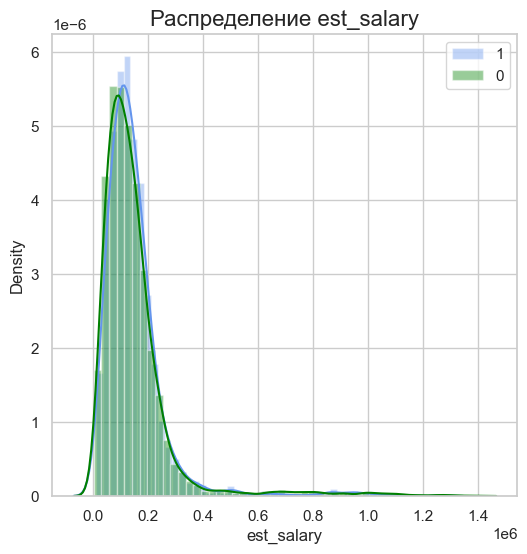

In [95]:
sns.distplot(data_churn_1['est_salary'],label='1')
sns.distplot(data_churn_0['est_salary'],label='0')
plt.title('Распределение est_salary',fontsize=16)
plt.legend()
plt.show()

В грубом приближении мы можем считать, что данные распределены нормально, поэтому проведем t-test.

In [96]:
data_test=data['est_salary']
data_test

0        75719.14
1        86621.77
2       107683.34
3       174423.53
4        67353.16
          ...    
9995     18943.64
9996    196898.29
9997    108905.09
9998     86874.90
9999     21422.37
Name: est_salary, Length: 9926, dtype: float64

In [97]:
from scipy.stats import normaltest
data = np.random.normal(loc = 20,scale =5, size = 150)
stat, p =normaltest(data_test)
print('stat =%.3f, p=%.3f/n' % (stat,p))
if p>0.05:
    print('Probably GAussian')
else:
    print('Probably not Gaussian')

stat =8461.213, p=0.000/n
Probably not Gaussian


Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.
Нулевая гипотеза- средняя выручка между оставшимися и ушедними пользователями равна
Альтернативная гипотеза - средняя выручка между оставшимися и ушедними пользователями отличается

In [98]:
alpha=0.05

print('Дисперсия ушедних:',data_churn_1['est_salary'].var())
print('Дисперсия оставшихся:',data_churn_0['est_salary'].var())

Дисперсия ушедних: 15107935966.8959
Дисперсия оставшихся: 20393464073.84777


In [99]:
results = st.ttest_ind(
    data_churn_0['est_salary'], 
    data_churn_1['est_salary'],equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8796213894730411
Не получилось отвергнуть нулевую гипотезу


Дисперсия отличается, так что equal_var=False
<p>Мы выяснили, что дисперсии ушедших и оставшихся равны и средняя выручка между оставшимися и ушедними пользователями равна.

In [100]:
est_1=data_churn_1.query('churn == 1')['est_salary']
est_0=data_churn_0.query('churn == 0')['est_salary']

In [101]:
alpha=0.05

In [102]:
results=st.mannwhitneyu(
    est_1,
    est_0) 

print('p-значение:', results.pvalue)

if(results.pvalue<alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00022703693954923942
Отвергаем нулевую гипотезу


Проведем аналогичный анализ для score. Сначала проведем проверку на нормальность

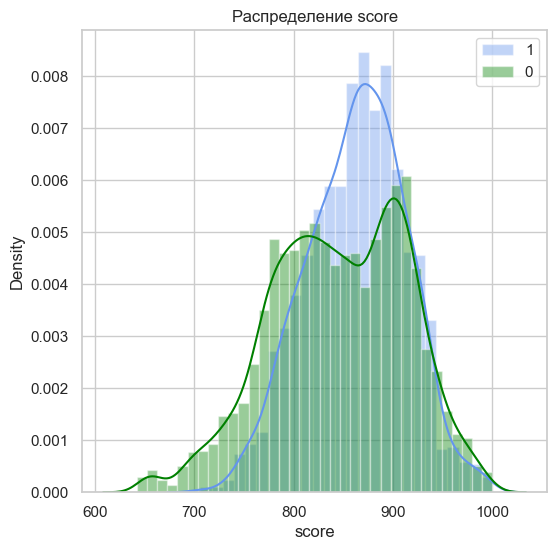

In [103]:
sns.distplot(data_churn_1['score'],label='1')
sns.distplot(data_churn_0['score'],label='0')
plt.title('Распределение score')
plt.legend()
plt.show()


In [104]:
alpha=0.05

print('Дисперсия ушедних:',data_churn_1['score'].var())
print('Дисперсия оставшихся:',data_churn_0['score'].var())

Дисперсия ушедних: 2457.304790951905
Дисперсия оставшихся: 4624.898722523541


Дисперсия отличается, так что equal_var=False

Проверим гипотезу различия score между теми клиентами, которые ушли и теми, которые остались.
Нулевая гипотеза- средний счет между оставшимися и ушедними пользователями равен. Альтернативная гипотеза - средний счет между оставшимися и ушедними пользователями отличается.

In [105]:
results = st.ttest_ind(
    data_churn_0['score'], 
    data_churn_1['score'], equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.5258910795157677e-37
Отвергаем нулевую гипотезу


Мы отвергли гипотезу о равестве средних score ушедших и оставшихся. Получается, уходящие пользователи становятся менее заинтересованными и их активность немного падает.

**Вывод**

В данном блоке мы выяснили, что больше всего склонны уходить пользователи с 0 лояльностью, женского пола, из Ростова Великого, старшего возраста. Также мы заметили, что почти все пользователи с количеством покупок 3 и 4 ушли. Проверили нулевую гипотезу- средняя выручка между оставшимися и ушедними пользователями равна и не смогли ее отвергнуть



|Показатель |Сравнение портретов/гипотезы|Корреляции|Распределения в разрезе оттока|
| :--- | :---: | :---: | :--- |
|неизвестный 1|есть связь         |нет связи | отточный интервал с __ по __ |
|неизвестный 2|не может быть связи         | |  |
|user_id    |       нет связи            |        нет связи  |          нет                    |
|score      |         есть связь          |   есть связь       |           860-900                   |
|city       |        есть связь           |      нет связи    |            нет            |
|gender     |         есть связь          |  есть связь        |                 Мужчины             |
|age        |             есть связь      |   нет связи       |                  24-35,51-60            |
|equity     |                есть связь   |  есть связь        |                 4+             |
|balance    |                  нет связи |     нет связи     |                        |
|products   |      есть связь             |   есть связь       |                 3+             |
|credit_card|         есть связь          |       есть связь   |                    нет          |
|last_activity|    нет связи             |   есть связь       |                    нет          |
|est_salary |       есть связь            |     нет связи     |                     90-110          |


**Выводы и рекомендации по итогу исследования:**
    На основании проведенного анализа можно сделать следующие выводы:

На отток больше всего влияют:

 - age возраст (более возрастные клиенты чаще уходят),
 - gender пол (мужчины более склонны к оттоку),
 - last_activity активность клиентов (чем активнее клиент, тем меньше вероятность оттока)
 - Большое количество продуктов негативно сказывается на активности клиентов.

В Ярославле отток больше, чем в других городах, возможно сказывается наличие в областном центре конкурентноспобных банков.



**Мы сегментировали клиентов банка по количеству продуктов, которыми они пользуются. У нас получилось три группы:**

- клиенты с одним продуктом - сегмент 1;
- клиенты с двубя продуктами - сегмент 2;
- клиенты с тремя и более продуктами - сегмент 3.

<p> В сегменте 1 больше склонны к уходу мужчины зрелого возраста (от 30 до 44 лет) с заработной платой от 100 до 200 тысяч. Они составляют 21.07% от всех клиентов банка, которые пользуются одним продуктом. Также склонны к уходу мужчины зрелого и среднего возраста (от 45 до 59 лет) с заработной платой от 50 до 100 тысяч: 8.94% и 7.23% соответственно. А среди женщин в сегменте 1 склонны к оттоку клиентки зрелого возраста с заработной платой от 100 до 200 тысяч (5.96%) и клиентки среднего возраста с заработной платой от 50 до 100 тысяч (5,11%).<p/>

**Рекомендации для сегмента 1**

Предложить клиентам с одним продуктом более выгодные предложения по другим видам продуктов банка.
Сделать более выгодные процентные ставки по потребительским кредитам и ипотеки для клиентов, склонных к оттоку.
Для клиентов с заработной платой от 100 тысяч и выше предложить продукты, связанные с инвестициями в ценные бумаги.

В сегменте 2 больше склонны к уходу мужчины зрелого возраста (от 30 до 44 лет) и мужчины среднего возраста (от 45 до 59 лет) с заработной платой от 100 до 200 тысяч. Они составляют 18.39% и 8.48% соответсвенно от всех клиентов банка, которые пользуются двумя продуктом. Еще склонны к уходу мужчины зрелого и среднего возраста, а также молодежь (до 29 лет) с заработной платой от 50 до 100 тысяч: 5.62%, 4.9% и 4.6% соответсвенно. 5.72% мужчин зрелого возраста с заработной платой от 200 до 300 тысяч тоже склонны уходить из банка. А среди женщин в сегменте 2 склонны к оттоку клиентки зрелого и среднего возраста с заработной платой от 100 до 200 тысяч (8.89% и 7.05% соответсвенно), а также клиентки среднего, зрелого и молодого возраста с заработной платой от 50 до 100 тысяч (3.58%, 2.04% и 2.55% соответственно).

**Рекомендации для сегмента 2**

Для клиентов с заработной платой от 50 до 100 тысяч предложить вклады от 20 тысяч с выгодным для них процентом.
Предложить более выгодные процентные ставки по потребительским кредитам и ипотеки для клиентов, склонных к оттоку.
Для клиентов с заработной платой от 100 тысяч и выше предложить продукты, связанные с инвестициями в ценные бумаги.

<p>В сегменте 3 больше склонны к уходу мужчины зрелого и среднего возраста с заработной платой от 100 до 200 тысяч. Они составляют 15,66% и 8,92% соответственно от всех клиентов банка, которые пользуются тремя и более продуктами. Мужчины зрелого и среднего возраста с заработной платой от 200 до 300 тысяч также склонны к уходу. Их количество составляет 7,41% и 2,19% соответсвенно. Еще склонны к уходу мужчины с заработной платой от 50 до 100 тысяч зрелого и среднего возраста: 5,72% и 5,05% соответсвенно. А среди женщин в сегменте 3 склонны к оттоку клиентки зрелого и среднего возраста с заработной платой от 100 до 200 тысяч (10,27% и 7,07% соответственно). Клиентки зрелого возраста с заработной платой от 200 до 300 тысяч, склонных к уходу, составляют 3,54%. Женщины среднего и зрелого возраста с заработной платой от 50 до 100 тысяч тоже склонны к оттоку: 3,37% и 3,2% соответственно.<p/>

**Рекомендации для сегмента 3**

Пересмотреть банковские продукты, которые были у этих клиентов и предложить им другие.
Уведомлять о спецпредложениях по кредитной/дебетовой карте, рефинансированию и другим имеющимся у клиента продуктам.

- В сегменте мужчин, не имеющих кредитной карты ,будучи активным клиентом средний % оттока 42,1% в кол-ве 717 клиентов.
Для данного сегмента возможно стоит провести кампанию по предоставлнию кредитный карт с льготным периодом и беспроцентным обслуживанием в 1 год использования.
- В сегменте мужчин из Ярославля имеющих 4 продукта банка % оттока 69,3%, в кол-ве 183 клиента.
Для данного сегмента необходимо выяснить предметно какие продукты используются данными клиентами, возможно имеется наличие продуктов с невыгодными условиями и конкурентным банком запущена кампания с более выгодными условиями (пример: ипотека, рефинансирование).

**Дополнительные сегменты**

- В сегменте активных клиентов мужчин с балансом более 750 000 тр на счете процент оттока составляет 69 %, кол-во таких клиентов 706. Для данного сегмента возможно необходимо предложить вклады с более выгодным процентом, предложить бесплатное обслуживание.
- В сегменте клиентов- мужчин с объетами собственности - 5 единиц у скоринговым баллом более 860 процент оттока составляет 50%, кол-во таких клиентов 555. Для данного сегмента возможно предложить страховку бъектов собственности по выгодной цене для заинтерисованности клиентов. Возможно предложение кэшбека повышеного при оплате жкх, налогов.
- В сегменте активных клиентов в возрасте 25 лет с зп 60 000 процент оттока составляет 43%, кол-во клиентов - 44. Для данного сегмента необходимо предложить бонусные программы с выгодными дебетовыми картами и повышенным кэшбеком. 

**Презентация** https://drive.google.com/file/d/18fAjrZeq6j7KVw4fwRx10AVna49k1gwN/view?usp=sharing